We will take a look at the commercial area data, specifically the 'Commercial Area Information - Medical Institutions, September 2019' dataset.

Before jumping right into analyzing the data, I will also overview some basic code for Exploratory Data Analysis (EDA). I have also included brief explanations of my code.

In [269]:
#!pip install koreanize-matplotlib

In [270]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import folium
import koreanize_matplotlib
import matplotlib.font_manager as fm
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')

%matplotlib inline

plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus=False)

In [271]:
df_raw = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/medical_201909.csv.zip", low_memory=False)

In [272]:
df = df_raw.copy()

### shape



- The shape attribute gives you the number of rows and columns in a dataframe.

In [273]:
num_shape = df.shape
print("Number of rows and columns:", num_shape)

Number of rows and columns: (91335, 39)


- rows

In [274]:
# return the first number of the shape result
num_rows = df.shape[0]
print("Number of rows:", num_rows)

Number of rows: 91335


- columns

In [275]:
columns = df.columns
print("Columns:", columns)

Columns: Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')


In [276]:
# return the second number of the shape result
print("Number of columns:", df.shape[1])

Number of columns: 39


In [277]:
num_columns = df.columns.value_counts().sum()
print("Number of columns:", num_columns)

Number of columns: 39


### head()/tail()

- The head() method gives you the first five rows of data by default. You can specify a different number of rows by passing an integer as an argument to head().

In [278]:
head_df = df.head()
print(head_df)

     상가업소번호        상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
0  19956873     하나산부인과  NaN         S       의료       S01       병원    S01B10   
1  20024149   타워광명내과의원  NaN         S       의료       S01       병원    S01B07   
2  20152277  조정현신경외과의원  NaN         S       의료       S01       병원    S01B15   
3  20350610   한귀원정신과의원  NaN         S       의료       S01       병원    S01B99   
4  20364049  더블유스토어수지점  수지점         S       의료       S02   약국/한약방    S02A01   

  상권업종소분류명 표준산업분류코드  ...                     건물관리번호      건물명  \
0     산부인과   Q86201  ...  4127310900110810000010857  산호한양아파트   
1    내과/외과   Q86201  ...  1168011800104670014000001      NaN   
2     신경외과   Q86201  ...  4139013200117400001017064    한라프라자   
3     기타병원      NaN  ...  2650010400100740001009932      NaN   
4       약국   G47811  ...  4146510100107120002026238      NaN   

                 도로명주소     구우편번호    신우편번호  동정보  층정보  호정보          경도  \
0   경기도 안산시 단원구 달미로 10  425764.0  15236.0  NaN  NaN  NaN  126.814295

In [279]:
head_df_10 = df.head(10)
print(head_df_10)

     상가업소번호        상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
0  19956873     하나산부인과  NaN         S       의료       S01       병원    S01B10   
1  20024149   타워광명내과의원  NaN         S       의료       S01       병원    S01B07   
2  20152277  조정현신경외과의원  NaN         S       의료       S01       병원    S01B15   
3  20350610   한귀원정신과의원  NaN         S       의료       S01       병원    S01B99   
4  20364049  더블유스토어수지점  수지점         S       의료       S02   약국/한약방    S02A01   
5  20809147     행신동물병원  NaN         S       의료       S04      수의업    S04A02   
6  20733252      춘산한약방  NaN         S       의료       S02   약국/한약방    S02A02   
7  20582210      부부탕제원  NaN         S       의료       S02   약국/한약방    S02A03   
8  20808534     코원성형외과  NaN         S       의료       S01       병원    S01B08   
9  20755460   헬로스마일소아과  NaN         S       의료       S01       병원    S01B11   

  상권업종소분류명 표준산업분류코드  ...                     건물관리번호      건물명  \
0     산부인과   Q86201  ...  4127310900110810000010857  산호한양아파트   
1 

- The tail() method gives you the last five rows of data by default. You can specify a different number of rows by passing an integer as an argument to tail().

In [280]:
tail_df = df.tail()
print(tail_df)

         상가업소번호           상호명   지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드  상권업종중분류명  \
91330  16196725         온누리약국   베스트         S       의료       S02    약국/한약방   
91331  16192180            리원  봄산후조         S       의료       S07  의료관련서비스업   
91332  16127538       참좋은요양병원   NaN         S       의료       S01        병원   
91333  16108681       경희중앙한의원   NaN         S       의료       S01        병원   
91334  16109073  천안김안과천안역본점의원   NaN         S       의료       S01        병원   

      상권업종소분류코드 상권업종소분류명 표준산업분류코드  ...                     건물관리번호    건물명  \
91330    S02A01       약국   G47811  ...  3017011200115070000021096    NaN   
91331    S07A07    산후조리원   S96993  ...  4128112300111460000011715  청한프라자   
91332    S01B17  노인/치매병원   Q86102  ...  2641010800105380001005572  한신시티빌   
91333    S01B06      한의원   Q86203  ...  1174010500103450009002392    NaN   
91334    S01B13     안과의원   Q86201  ...  4413110700102660017016314    김안과   

                     도로명주소     구우편번호    신우편번호  동정보  층정보  호정보          경도  

In [281]:
tail_df_10 = df.tail(10)
print(tail_df_10)

         상가업소번호           상호명       지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드  \
91325  16109238         녹지미의원       NaN         S       의료       S01   
91326  16130997        새삶의료선교       NaN         S       의료       S01   
91327  16190388         오피스알파     치과기공소         S       의료       S03   
91328  16198812         서울플러스       NaN         S       의료       S01   
91329  16199523            리원  위대한탄생산후조         S       의료       S07   
91330  16196725         온누리약국       베스트         S       의료       S02   
91331  16192180            리원      봄산후조         S       의료       S07   
91332  16127538       참좋은요양병원       NaN         S       의료       S01   
91333  16108681       경희중앙한의원       NaN         S       의료       S01   
91334  16109073  천안김안과천안역본점의원       NaN         S       의료       S01   

       상권업종중분류명 상권업종소분류코드 상권업종소분류명 표준산업분류코드  ...                     건물관리번호  \
91325        병원    S01B07    내과/외과   Q86201  ...  2726010100105610004019567   
91326        병원    S01B07    내과/외과   Q86201  ... 

In [282]:
sample_df = df.sample()
print(sample_df)

         상가업소번호     상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
19648  25048472  다봄의료재단  NaN         S       의료       S01       병원    S01B02   

      상권업종소분류명 표준산업분류코드  ...                     건물관리번호  건물명  \
19648     일반병원   Q86102  ...  4711111200100940004121976  NaN   

                    도로명주소     구우편번호    신우편번호  동정보  층정보  호정보          경도  \
19648  경상북도 포항시 남구 냉천로 58  790833.0  37878.0  NaN  NaN  NaN  129.399831   

              위도  
19648  35.987684  

[1 rows x 39 columns]


### info()

- The info() method provides information about the data types of each column.

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

In [284]:
df.dtypes
# dtypes allows us to directly see the data type of each column.

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드         float64
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호        float64
신우편번호        float64
동정보           object
층정보           object
호정보           object
경도           float64
위도           float64
dtype: object

### isnull()

- isnull() shows where the missing values are by returning `True` for missing values and `False` for others.

In [285]:
df.isnull()

상가업소번호    상호명    지점명  상권업종대분류코드  상권업종대분류명  상권업종중분류코드  상권업종중분류명  \
0       False  False   True      False     False      False     False   
1       False  False   True      False     False      False     False   
2       False  False   True      False     False      False     False   
3       False  False   True      False     False      False     False   
4       False  False  False      False     False      False     False   
...       ...    ...    ...        ...       ...        ...       ...   
91330   False  False  False      False     False      False     False   
91331   False  False  False      False     False      False     False   
91332   False  False   True      False     False      False     False   
91333   False  False   True      False     False      False     False   
91334   False  False   True      False     False      False     False   

       상권업종소분류코드  상권업종소분류명  표준산업분류코드  ...  건물관리번호    건물명  도로명주소  구우편번호  신우편번호  \
0          False     False     False  ...   False  False  False  False  False   
1          False     False     False  ...   False   True  False  False  False   
2          False     False     False  ...   False  False  False  False  False   
3          False     False      True  ...   False   True  False  False  False   
4          False     False     False  ...   False   True  False  False  False   
...          ...       ...       ...  ...     ...    ...    ...    ...    ...   
91330      False     False     False  ...   False   True  False  False  False   
91331      False     False     False  ...   False  False  False  False  False   
91332      False     False     False  ...   False  False  False  False  False   
91333      False     False     False  ...   False   True  False  False  False   
91334      False     False     False  ...   False  False  False  False  False   

        동정보    층정보   호정보     경도     위도  
0      True   True  True  False  False  
1      True  False  True  False  False  
2      True   True  True  False  False  
3      True  False  True  False  False  
4      True  False  True  False  False  
...     ...    ...   ...    ...    ...  
91330  True   True  True  False  False  
91331  True   True  True  False  False  
91332  True  False  True  False  False  
91333  True   True  True  False  False  
91334  True   True  True  False  False  

[91335 rows x 39 columns]

In [286]:
# Calculate the sum of isnull for each column
df.isnull().sum()

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47291
호정보          75784
경도               0
위도               0
dtype: int64

<Axes: >

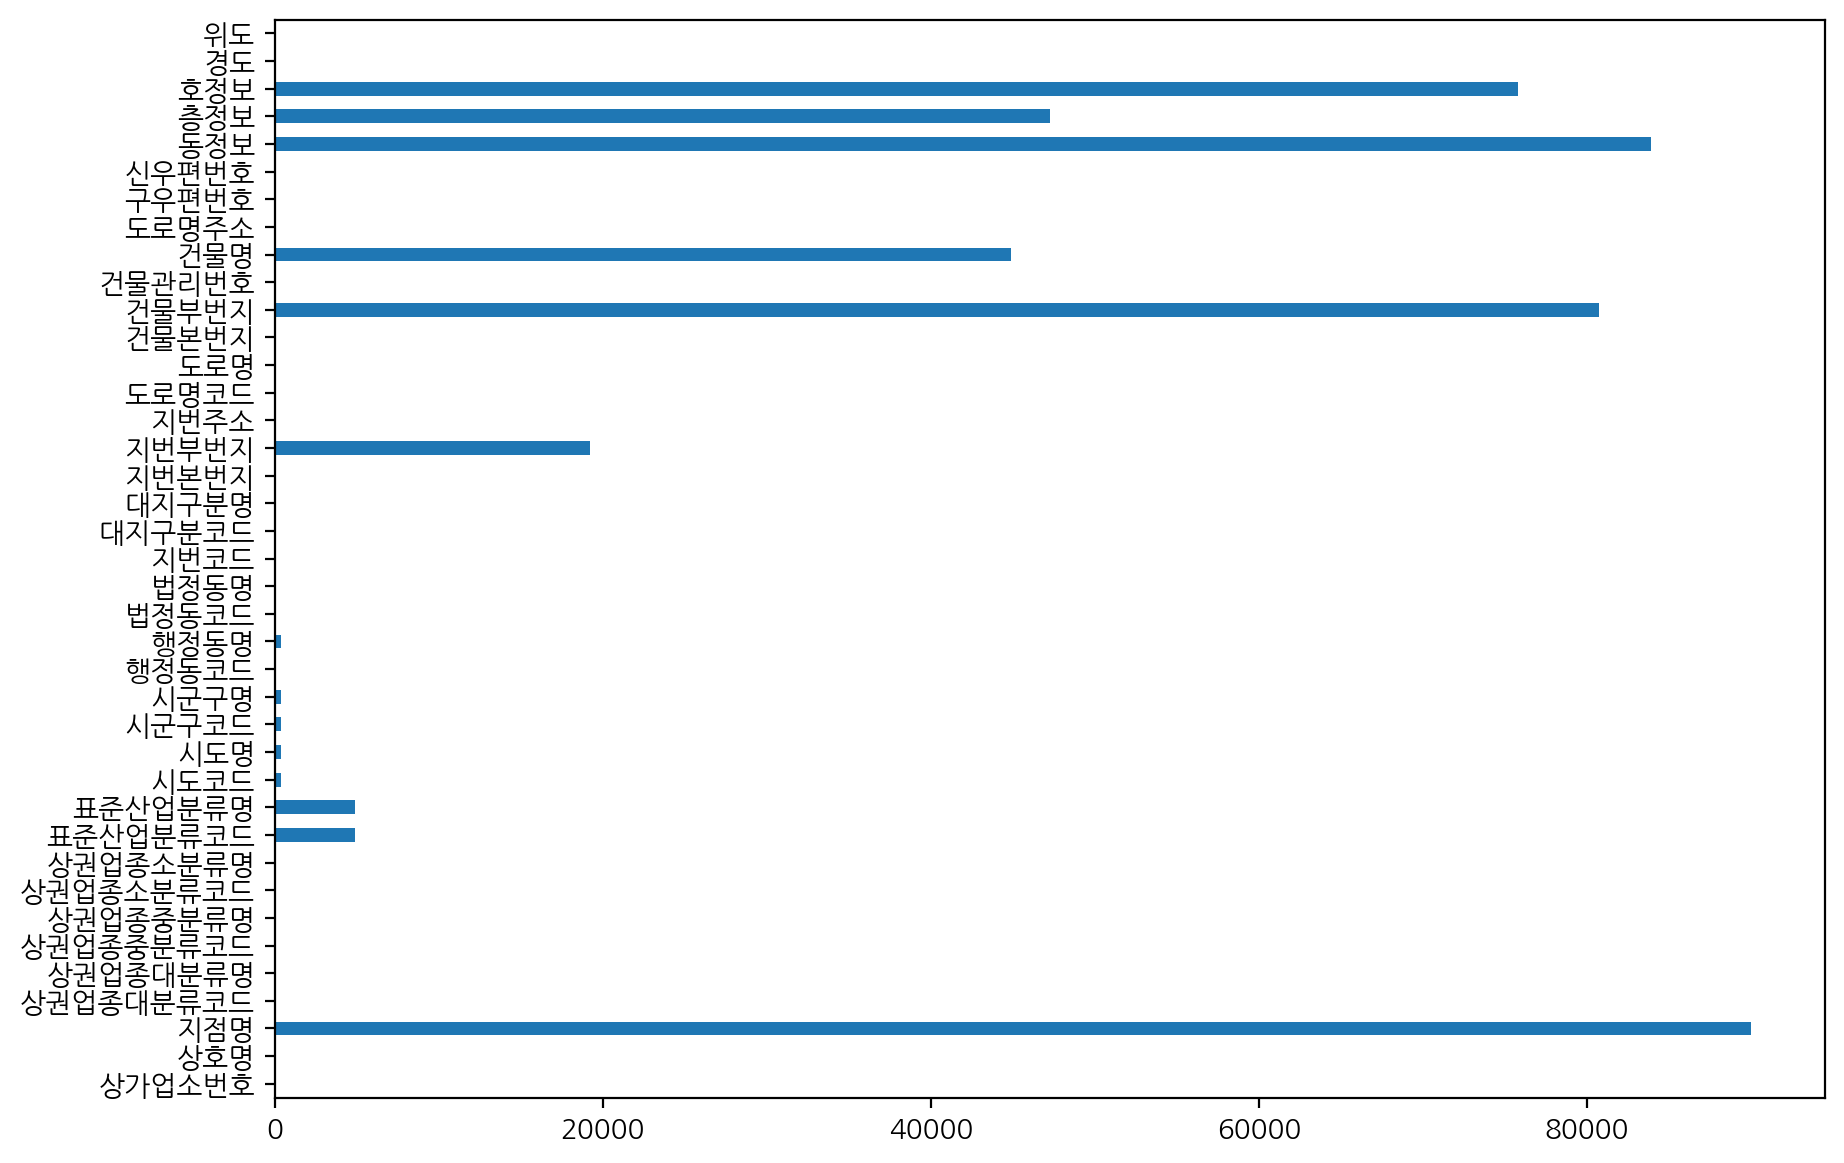

In [287]:
# visualize the total number of null values in each column
df.isnull().sum().plot.barh(figsize=(10, 7))

In [288]:
# store the number of missing values for each column in a new dataframe
df_null_count = df.isnull().sum().reset_index()
df_null_count.head()

index      0
0     상가업소번호      0
1        상호명      0
2        지점명  89989
3  상권업종대분류코드      0
4   상권업종대분류명      0

In [289]:
# assign new names to the columns of the dataframe
df_null_count.columns = ["컬럼명", "결측치수"]
df_null_count.head()

컬럼명   결측치수
0     상가업소번호      0
1        상호명      0
2        지점명  89989
3  상권업종대분류코드      0
4   상권업종대분류명      0

In [290]:
# sort columns by the number of missing values
df_null_head = df_null_count.sort_values(
    by="결측치수",
    ascending=False).head(9)
df_null_head

컬럼명   결측치수
2        지점명  89989
34       동정보  83929
28     건물부번지  80731
36       호정보  75784
35       층정보  47291
30       건물명  44882
23     지번부번지  19256
9   표준산업분류코드   4922
10   표준산업분류명   4922

In [291]:
df["지점명"].head(1)

0    NaN
Name: 지점명, dtype: object

In [292]:
# drop the columns with null values.
drop_columns = df_null_head["컬럼명"].values
drop_columns

array(['지점명', '동정보', '건물부번지', '호정보', '층정보', '건물명', '지번부번지', '표준산업분류코드',
       '표준산업분류명'], dtype=object)

In [293]:
df[drop_columns].head()

지점명  동정보  건물부번지  호정보  층정보      건물명  지번부번지 표준산업분류코드         표준산업분류명
0  NaN  NaN    NaN  NaN  NaN  산호한양아파트    NaN   Q86201           일반 의원
1  NaN  NaN    NaN  NaN    4      NaN   14.0   Q86201           일반 의원
2  NaN  NaN    NaN  NaN  NaN    한라프라자    1.0   Q86201           일반 의원
3  NaN  NaN    NaN  NaN    5      NaN    1.0      NaN             NaN
4  수지점  NaN    NaN  NaN    1      NaN    2.0   G47811  의약품 및 의료용품 소매업

In [294]:
print(df.shape)
df = df.drop(columns=drop_columns, axis=1)
print(df.shape)

(91335, 39)
(91335, 30)


### Basic statistical values

In [295]:
# mean
df["위도"].mean()

36.62471119236685

In [296]:
# median
df["위도"].median()

37.2346523177033

In [297]:
# max
df["위도"].max()

38.4996585705598

In [298]:
# min
df["위도"].min()

33.2192896688307

In [299]:
# count
df["위도"].count()

91335

In [300]:
# use describe to view count, and quartiles for the column
df["위도"].describe()

count    91335.000000
mean        36.624711
std          1.041361
min         33.219290
25%         35.811830
50%         37.234652
75%         37.507463
max         38.499659
Name: 위도, dtype: float64

In [301]:
# use a list format to select more than one column
df[["위도", "경도"]].describe()

위도            경도
count  91335.000000  91335.000000
mean      36.624711    127.487524
std        1.041361      0.842877
min       33.219290    124.717632
25%       35.811830    126.914297
50%       37.234652    127.084550
75%       37.507463    128.108919
max       38.499659    130.909912

In [302]:
# display the columns where the data type is object
df.describe(include="object")

상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드 상권업종소분류명    시도명  \
count   91335     91335    91335     91335    91335     91335    91335  90956   
unique  56910         1        1         5        5        34       34     17   
top        리원         S       의료       S01       병원    S02A01       약국    경기도   
freq      152     91335    91335     60774    60774     18964    18964  21374   

         시군구명   행정동명   법정동명  대지구분명                  지번주소             도로명  \
count   90956  90956  91280  91335                 91335           91335   
unique    228   2791   2822      2                 53118           16610   
top        서구    중앙동     중동     대지  서울특별시 동대문구 제기동 965-1  서울특별시 강남구 강남대로   
freq     3165   1856    874  91213                   198             326   

                           건물관리번호                  도로명주소  
count                       91335                  91335  
unique                      54142                  54031  
top     1123010300109650001031604  서울특별시 동대문구 약령중앙로8길 10  
freq                          198                    198

In [303]:
df["상권업종대분류명"].unique()

array(['의료'], dtype=object)

In [304]:
df["상권업종대분류명"].nunique()

1

In [305]:
df["상권업종중분류명"].unique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [306]:
df["상권업종중분류명"].nunique()

5

In [307]:
df["상권업종소분류명"].unique()

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

In [308]:
df["상권업종소분류명"].nunique()

34

In [309]:
# use len istead of nunique
len(df["상권업종소분류명"].unique())

34

### value_counts()

In [310]:
df["시도코드"].value_counts()

시도코드
41.0    21374
11.0    18943
26.0     6473
48.0     4973
28.0     4722
27.0     4597
47.0     4141
45.0     3894
44.0     3578
46.0     3224
29.0     3214
30.0     3067
43.0     2677
42.0     2634
31.0     1997
50.0     1095
36.0      353
Name: count, dtype: int64

In [311]:
df["시도명"].value_counts()

시도명
경기도        21374
서울특별시      18943
부산광역시       6473
경상남도        4973
인천광역시       4722
대구광역시       4597
경상북도        4141
전라북도        3894
충청남도        3578
전라남도        3224
광주광역시       3214
대전광역시       3067
충청북도        2677
강원도         2634
울산광역시       1997
제주특별자치도     1095
세종특별자치시      353
Name: count, dtype: int64

In [312]:
df["시도명"].value_counts(normalize=True)

시도명
경기도        0.234993
서울특별시      0.208266
부산광역시      0.071166
경상남도       0.054675
인천광역시      0.051915
대구광역시      0.050541
경상북도       0.045528
전라북도       0.042812
충청남도       0.039338
전라남도       0.035446
광주광역시      0.035336
대전광역시      0.033720
충청북도       0.029432
강원도        0.028959
울산광역시      0.021956
제주특별자치도    0.012039
세종특별자치시    0.003881
Name: proportion, dtype: float64

<Axes: ylabel='시도명'>

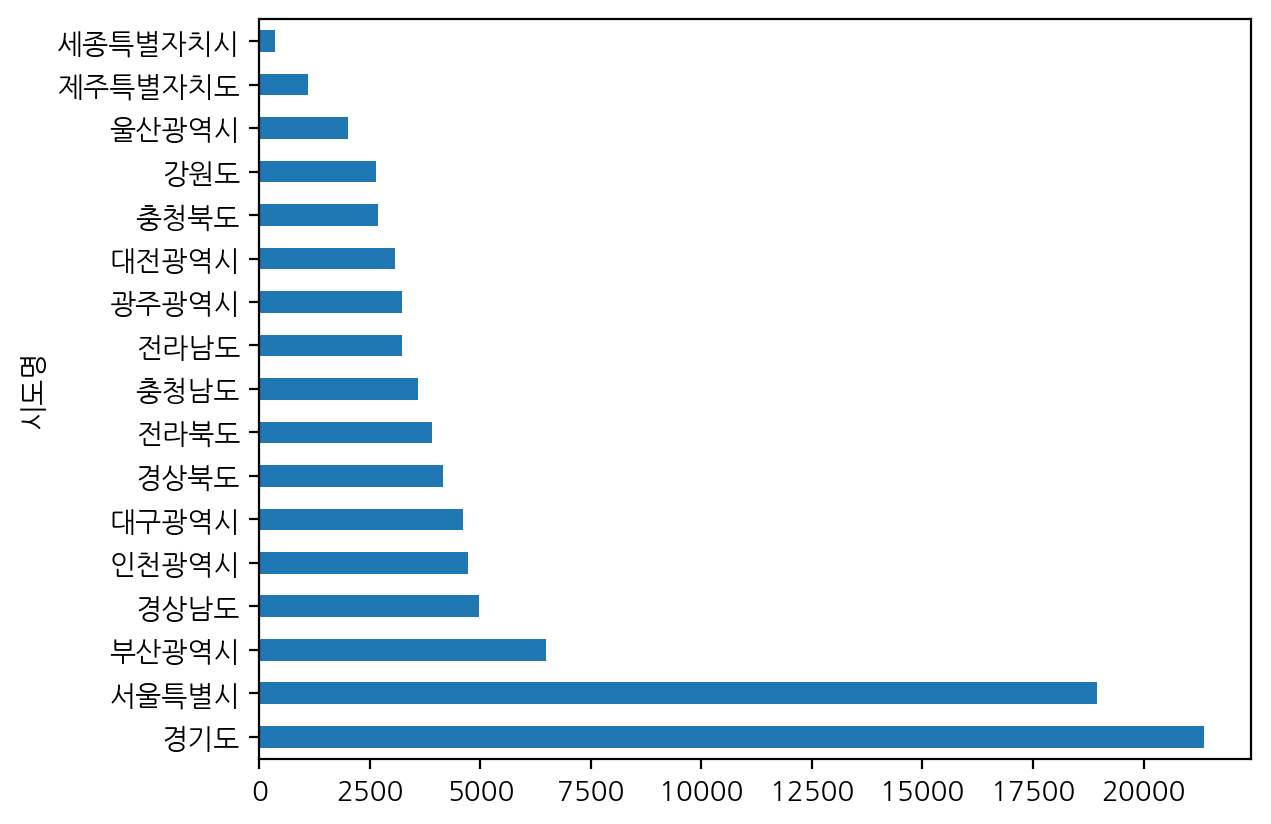

In [313]:
df["시도명"].value_counts().plot.barh()

<Axes: ylabel='count'>

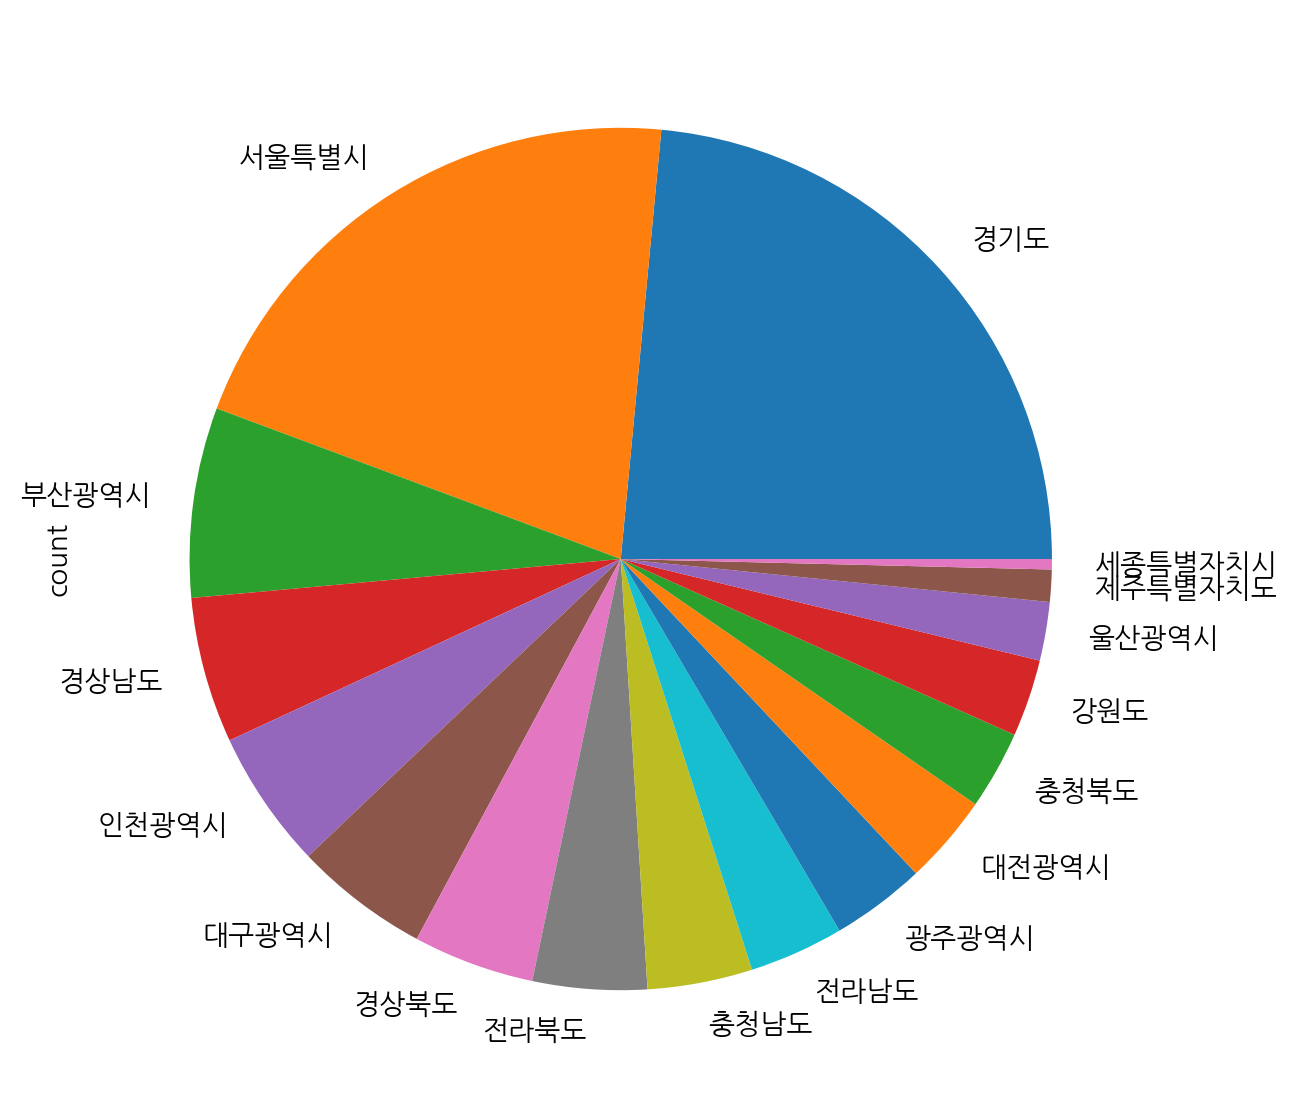

In [314]:
df["시도명"].value_counts().plot.pie(figsize=(7, 7))

- With seaborn, you generally need to specify x, y, and data, but for countplot, you can provide just one of x or y.

  - Advantages of seaborn:
It offers advanced statistical functions directly within the graphs.

  - Disadvantages of seaborn:
It becomes slower as the size of the dataset increases.


<Axes: xlabel='count', ylabel='시도명'>

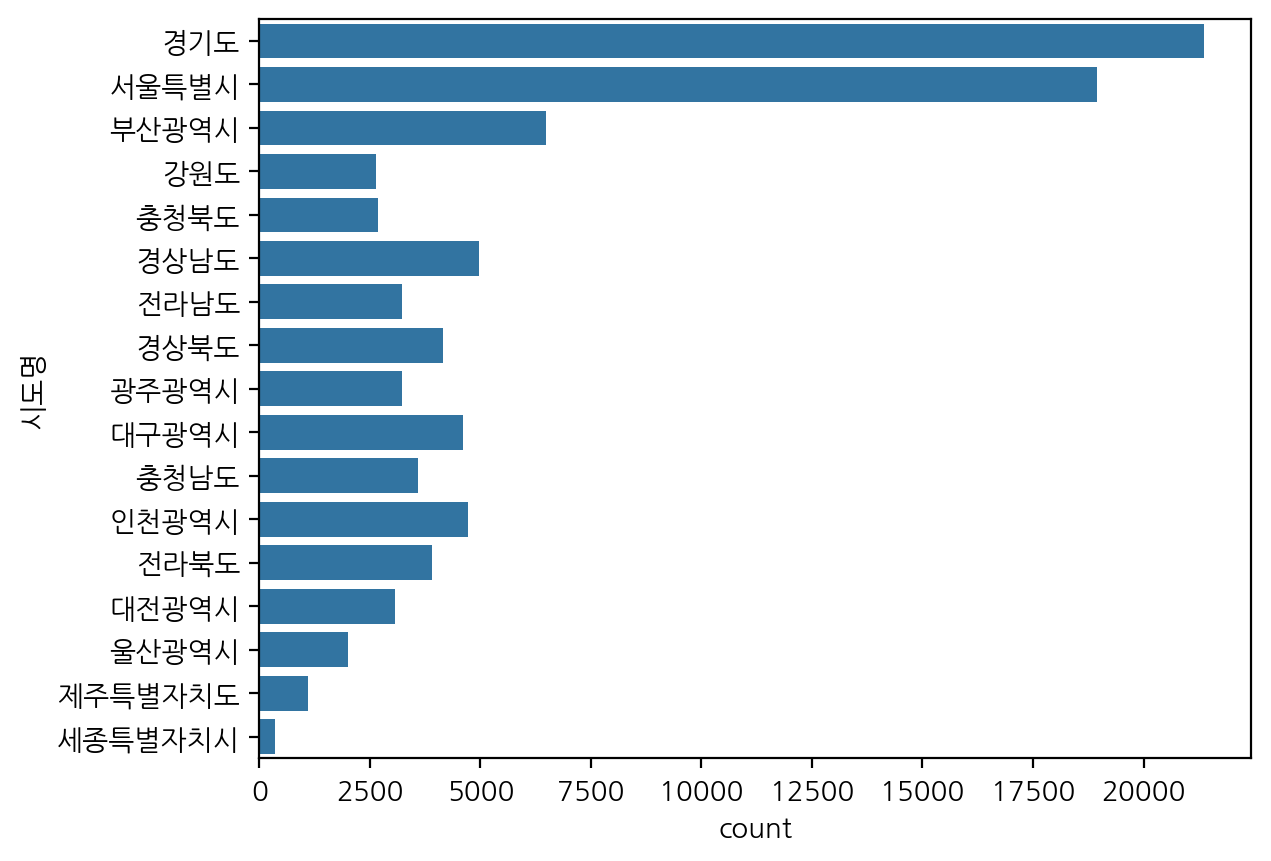

In [315]:
sns.countplot(data=df, y="시도명")

In [316]:
df["상권업종대분류명"].value_counts()

상권업종대분류명
의료    91335
Name: count, dtype: int64

In [317]:
df["상권업종중분류명"].value_counts()

상권업종중분류명
병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: count, dtype: int64

In [318]:
df["상권업종중분류명"].value_counts(normalize=True)

상권업종중분류명
병원          0.665397
약국/한약방      0.229080
수의업         0.058280
유사의료업       0.041320
의료관련서비스업    0.005923
Name: proportion, dtype: float64

<Axes: ylabel='상권업종중분류명'>

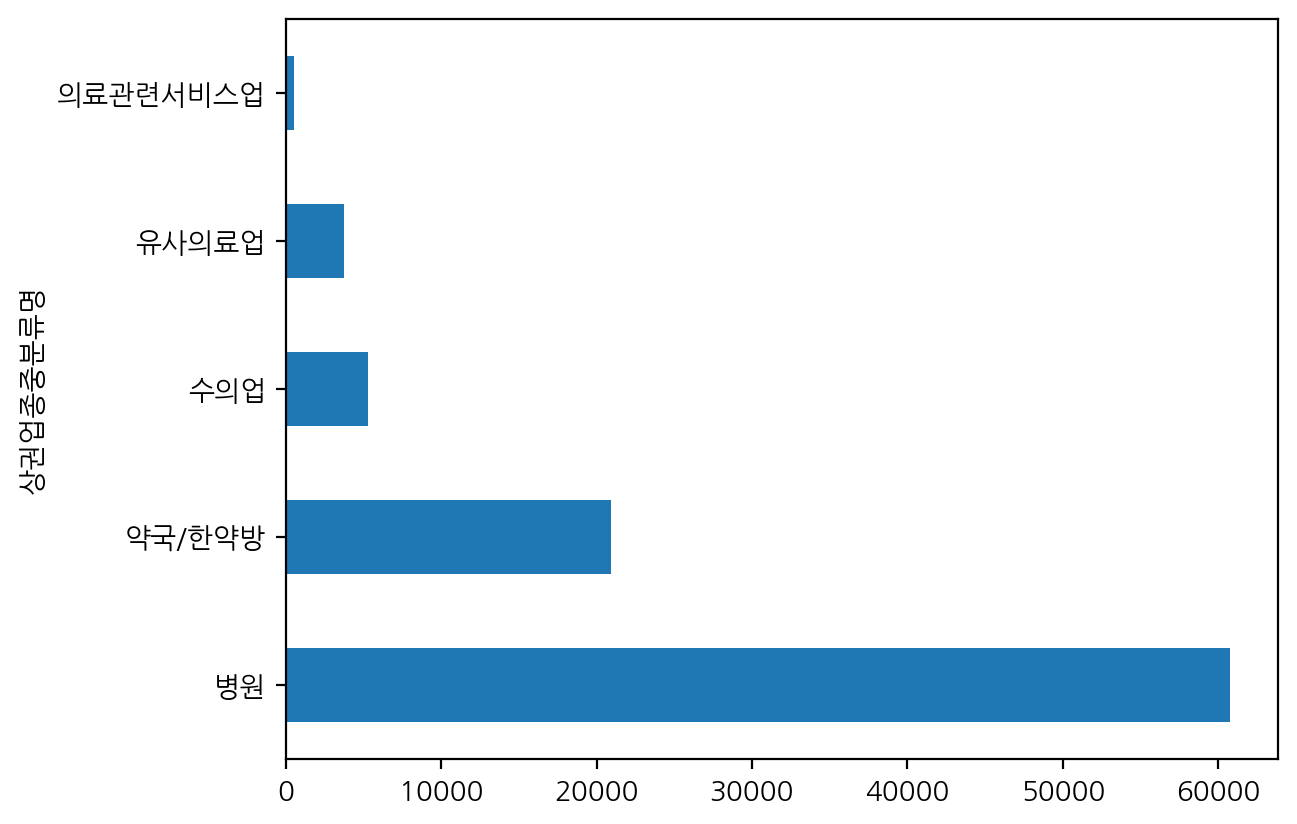

In [319]:
df["상권업종중분류명"].value_counts().plot.barh()

<Axes: ylabel='상권업종중분류명'>

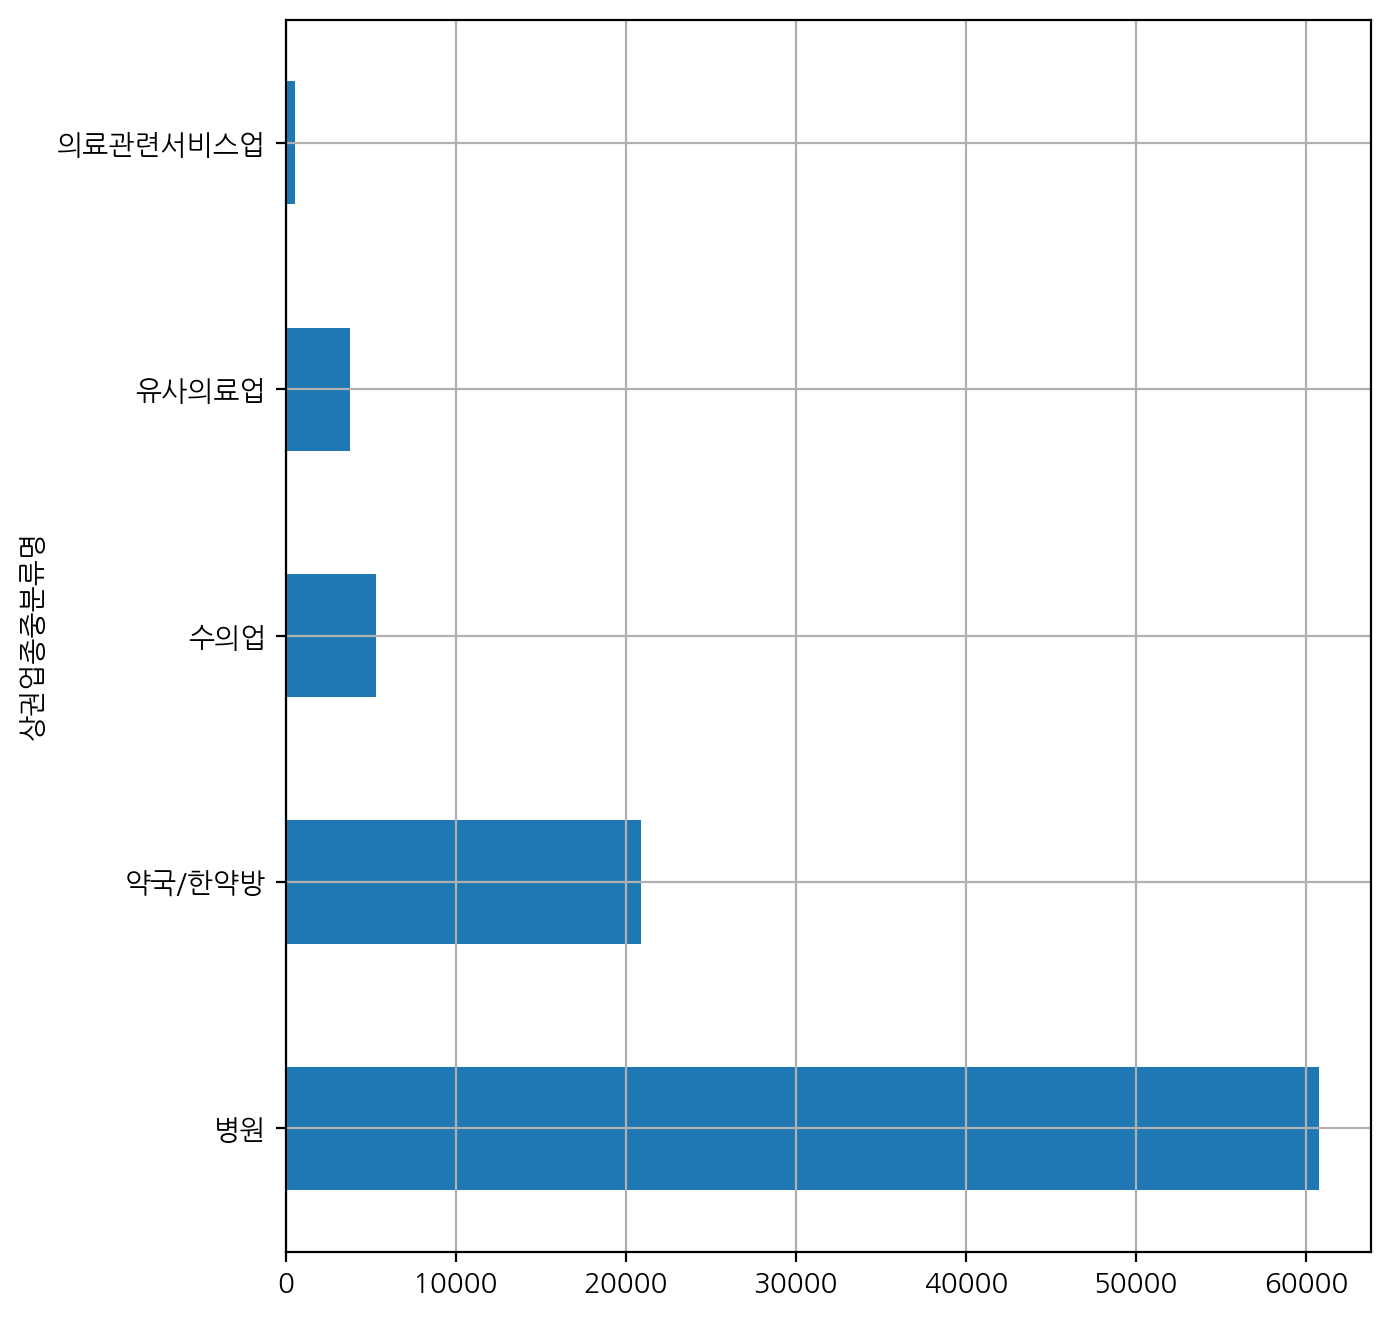

In [320]:
# add figure size and grid
df["상권업종중분류명"].value_counts().plot.barh(figsize=(7,8), grid=True)

<Axes: ylabel='count'>

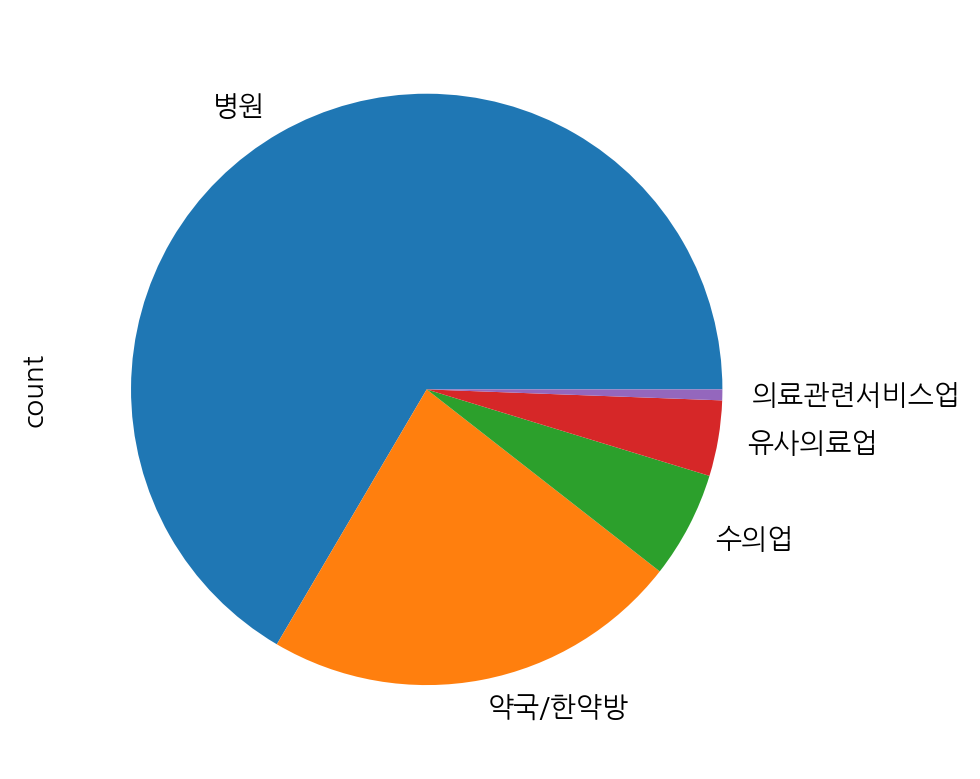

In [321]:
df["상권업종중분류명"].value_counts().plot.pie()

In [322]:
df["상권업종소분류명"].value_counts()

상권업종소분류명
약국         18964
치과의원       13731
한의원        13211
내과/외과      11374
기타병원        4922
일반병원        3385
동물병원        3098
정형/성형외과     2562
소아과         2472
수의업-종합      2216
치과기공소       1724
이비인후과의원     1486
한약방         1442
피부과         1273
산부인과        1116
노인/치매병원     1055
안과의원        1042
비뇨기과         809
종합병원         762
치과병원         756
언어치료         664
유사의료업기타      629
탕제원          517
산후조리원        511
신경외과         421
한방병원         397
척추교정치료       338
침구원          154
혈액원          130
응급구조대        125
조산원           30
접골원            9
수의업-기타         9
제대혈            1
Name: count, dtype: int64

<Axes: ylabel='상권업종소분류명'>

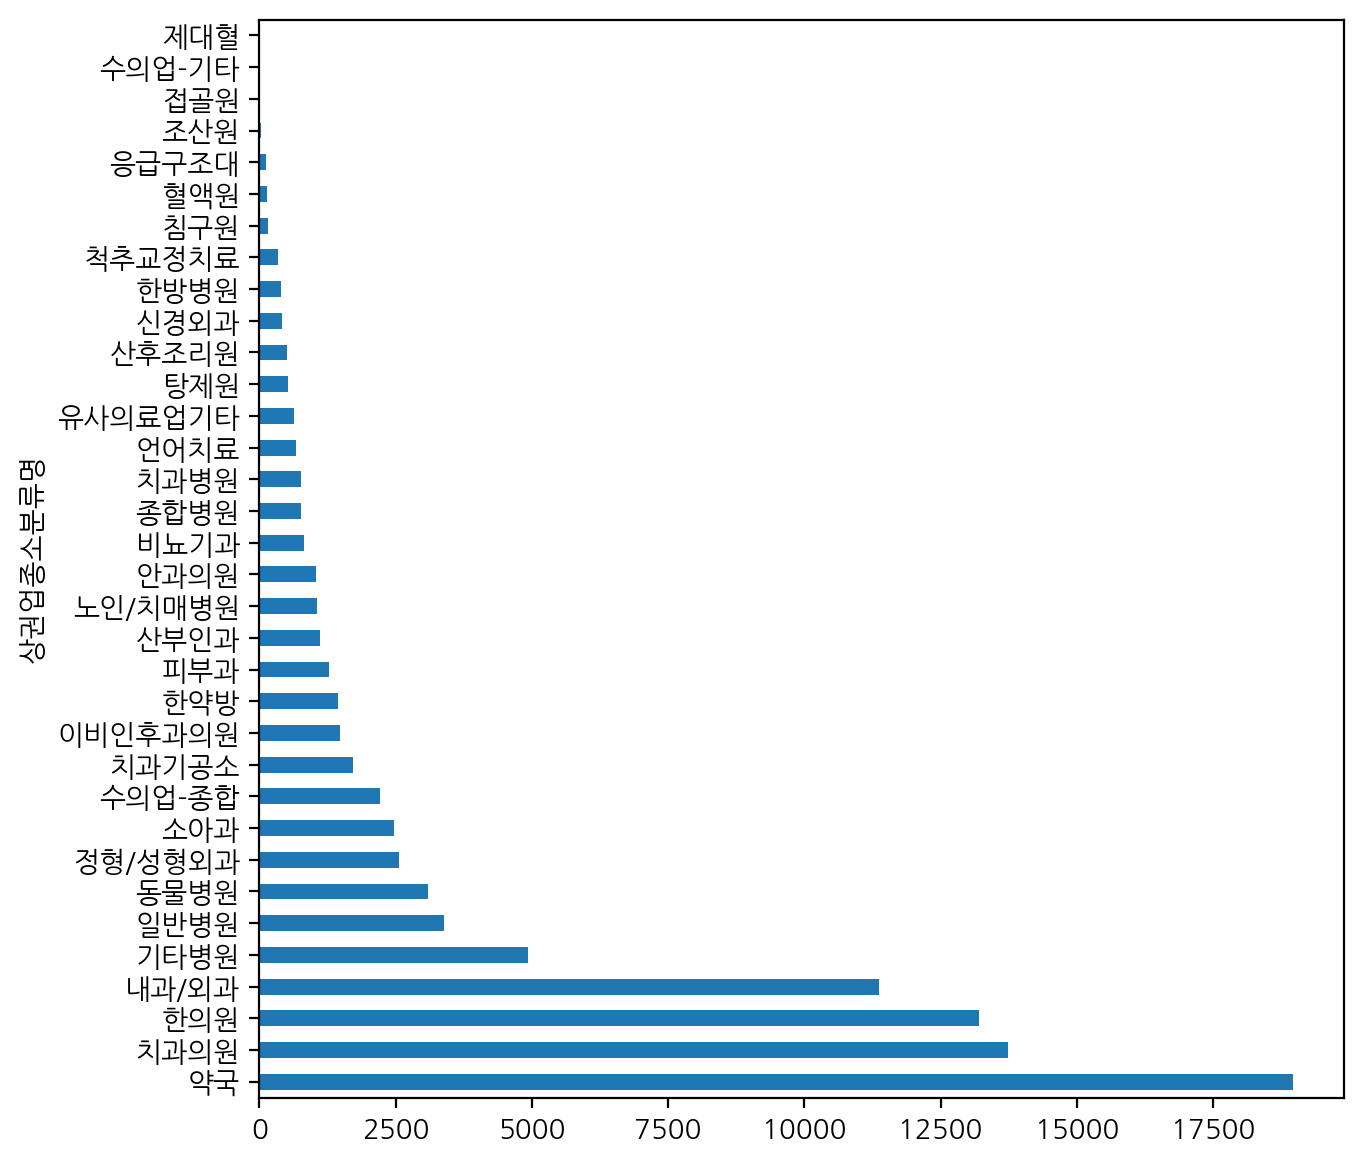

In [323]:
df["상권업종소분류명"].value_counts().plot.barh(figsize=(7, 7))

In [324]:
df_medical = df[df["상권업종중분류명"] == "약국/한약방"]
df_medical.head(1)

상가업소번호        상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
4  20364049  더블유스토어수지점         S       의료       S02   약국/한약방    S02A01   

  상권업종소분류명  시도코드  시도명  ...                    지번주소         도로명코드  \
4       약국  41.0  경기도  ...  경기도 용인시 수지구 풍덕천동 712-2  414653205024   

               도로명 건물본번지                     건물관리번호               도로명주소  \
4  경기도 용인시 수지구 문정로    32  4146510100107120002026238  경기도 용인시 수지구 문정로 32   

      구우편번호    신우편번호          경도         위도  
4  448170.0  16837.0  127.095522  37.323528  

[1 rows x 30 columns]

In [325]:
shop_type = df["상권업종대분류명"] == "의료"
df.loc[shop_type, "상권업종중분류명"].value_counts()

상권업종중분류명
병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: count, dtype: int64

In [326]:
df_medi = df[df["상권업종중분류명"] == "유사의료업"]
df_medi.shape

(3774, 30)

In [327]:
df["상호명"].value_counts().head(10)

상호명
리원       152
온누리약국    149
경희한의원    141
우리약국     119
중앙약국     111
전자담배      98
조은약국      95
건강약국      87
제일약국      79
사랑약국      73
Name: count, dtype: int64

In [328]:
df_medi["상호명"].value_counts().head(10)

상호명
리원          32
고려수지침       22
대한적십자사      17
헌혈의집        12
고려수지침학회     10
수치과기공소      10
제일치과기공소      9
미소치과기공소      8
아트치과기공소      8
이사랑치과기공소     8
Name: count, dtype: int64

In [329]:
df_seoul_drug = df[
    (df["상권업종소분류명"] == "약국") &
    (df["시도명"]== "서울특별시")]
df_seoul_drug.head(1)

상가업소번호    상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드 상권업종소분류명  \
33  20816709  이즈타워약         S       의료       S02   약국/한약방    S02A01       약국   

    시도코드    시도명  ...               지번주소         도로명코드             도로명 건물본번지  \
33  11.0  서울특별시  ...  서울특별시 강남구 역삼동 821  116803122010  서울특별시 강남구 테헤란로   101   

                       건물관리번호               도로명주소     구우편번호   신우편번호  \
33  1168010100108210001000001  서울특별시 강남구 테헤란로 101  135080.0  6134.0   

            경도         위도  
33  127.028023  37.498656  

[1 rows x 30 columns]

In [330]:
df_seoul_drug["시군구명"].value_counts()

시군구명
강남구     374
동대문구    261
광진구     212
서초구     191
송파구     188
노원구     169
성북구     160
은평구     151
영등포구    145
강서구     136
마포구     136
중랑구     129
서대문구    120
관악구     118
강동구     117
종로구     111
양천구     109
중구      106
강북구     104
구로구     102
동작구      96
성동구      88
용산구      87
금천구      85
도봉구      84
Name: count, dtype: int64

In [331]:
df_seoul_drug["시군구명"].value_counts(normalize=True)

시군구명
강남구     0.104498
동대문구    0.072925
광진구     0.059234
서초구     0.053367
송파구     0.052529
노원구     0.047220
성북구     0.044705
은평구     0.042191
영등포구    0.040514
강서구     0.037999
마포구     0.037999
중랑구     0.036044
서대문구    0.033529
관악구     0.032970
강동구     0.032691
종로구     0.031014
양천구     0.030455
중구      0.029617
강북구     0.029058
구로구     0.028500
동작구     0.026823
성동구     0.024588
용산구     0.024308
금천구     0.023750
도봉구     0.023470
Name: proportion, dtype: float64

<Axes: xlabel='시군구명'>

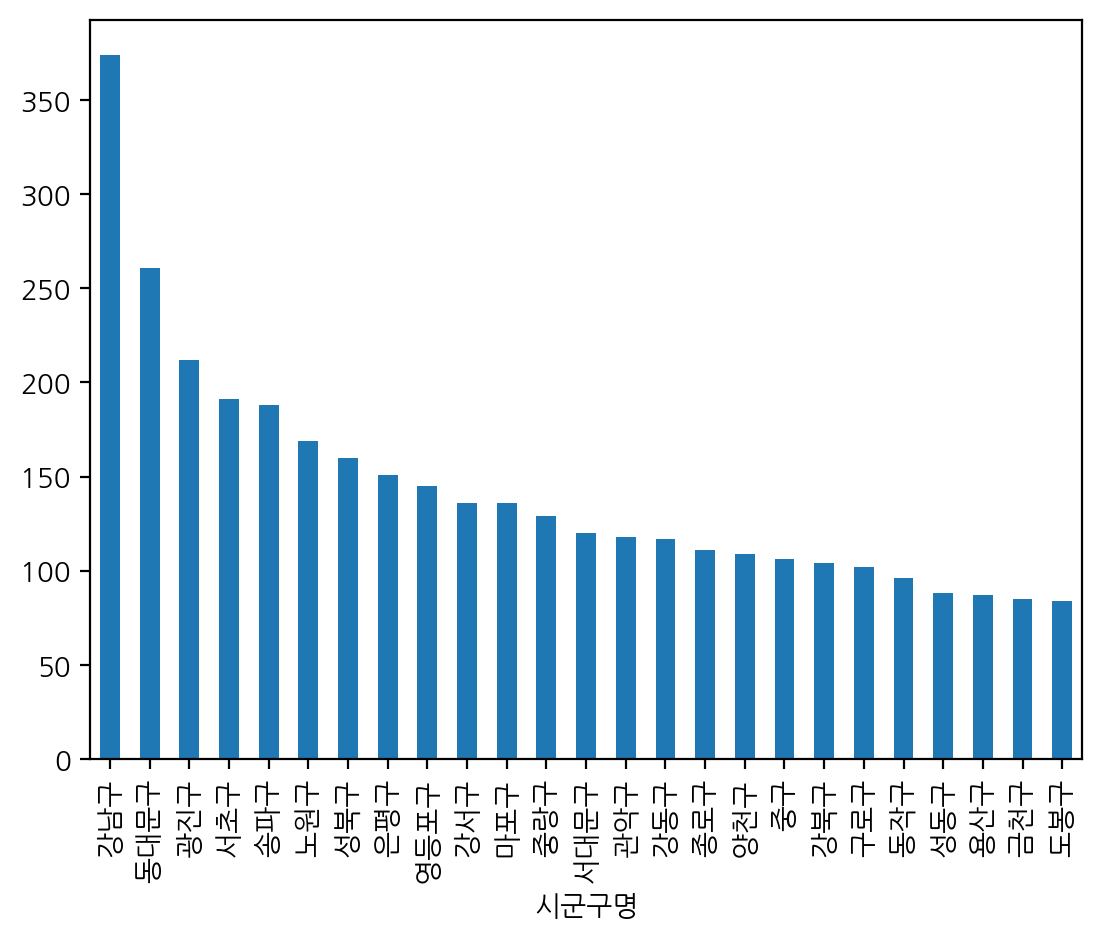

In [332]:
df_seoul_drug["시군구명"].value_counts().plot.bar()
# plot.bar() creates a vertical bar plot

<Axes: ylabel='시군구명'>

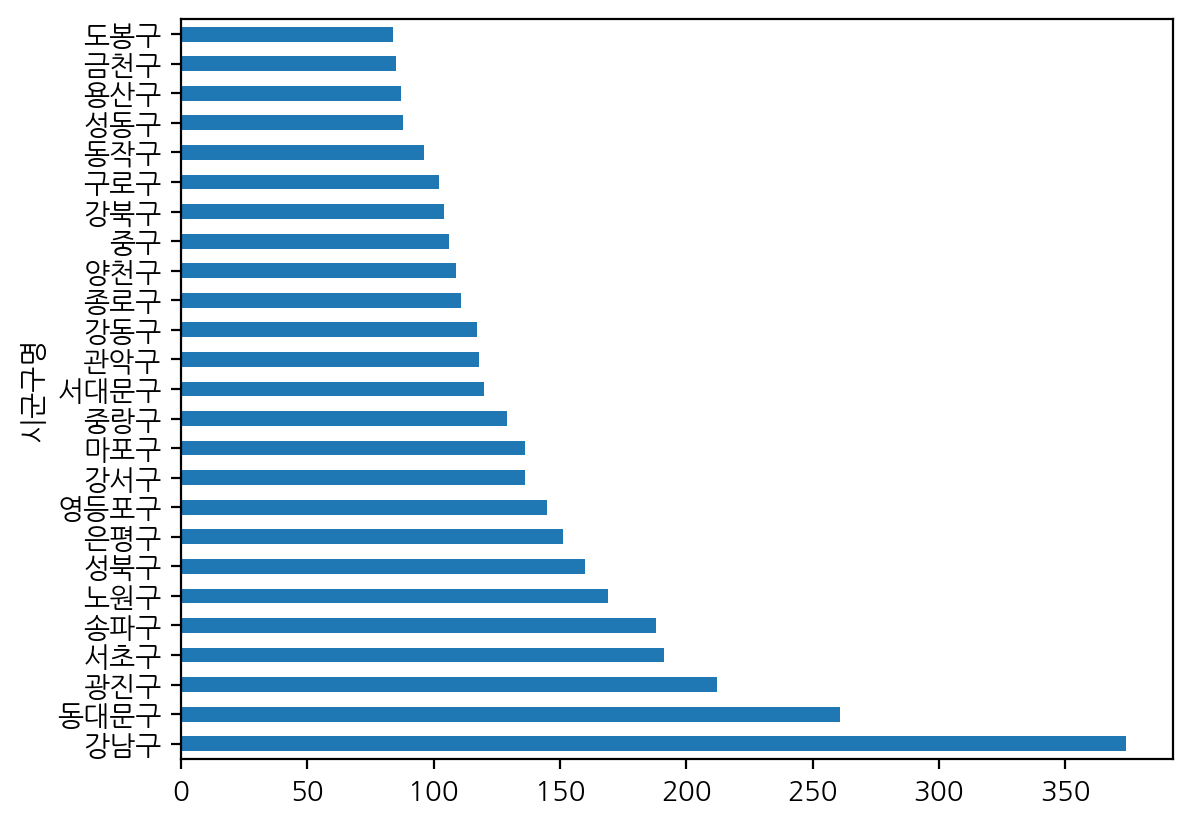

In [333]:
df_seoul_drug["시군구명"].value_counts().plot.barh()
# plot.barh() creates a horizontal bar plot
# It's easier to interpret the data visually

<Axes: ylabel='시군구명'>

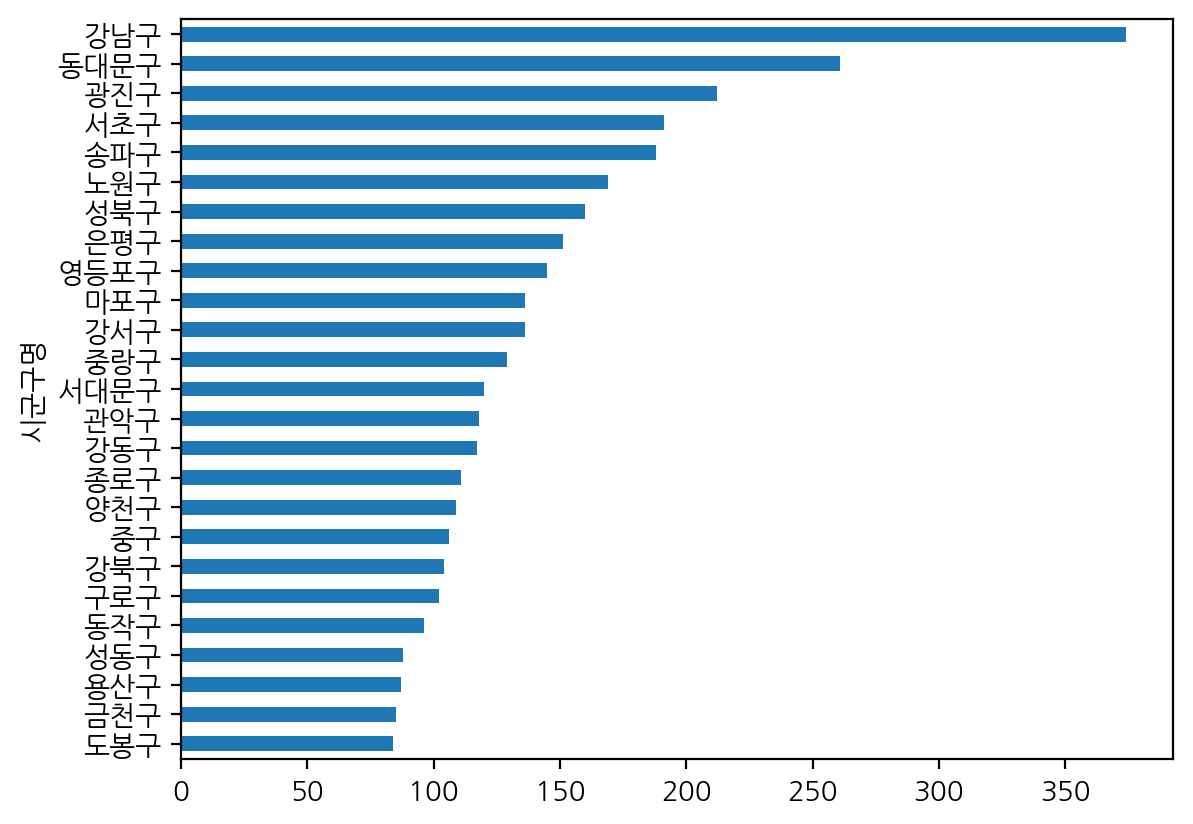

In [334]:
df_seoul_drug["시군구명"].value_counts(ascending=True).plot.barh()
# sort the data first and then plot it

In [335]:
df_seoul_hospital = df[
    (df["상권업종소분류명"] == "종합병원") &
    (df["시도명"]== "서울특별시")]
df_seoul_hospital.head(1)

상가업소번호     상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
305  25155642  대진의료재단         S       의료       S01       병원    S01B01   

    상권업종소분류명  시도코드    시도명  ...                 지번주소         도로명코드  \
305     종합병원  11.0  서울특별시  ...  서울특별시 광진구 중곡동 58-25  112153104006   

                도로명 건물본번지                     건물관리번호               도로명주소  \
305  서울특별시 광진구 긴고랑로   119  1121510100100580025000733  서울특별시 광진구 긴고랑로 119   

        구우편번호   신우편번호          경도         위도  
305  143220.0  4944.0  127.088279  37.559048  

[1 rows x 30 columns]

In [336]:
df_seoul_hospital["시군구명"].value_counts()

시군구명
강남구     15
영등포구     8
광진구      6
서초구      6
강동구      5
중구       5
송파구      5
강북구      4
도봉구      4
서대문구     4
양천구      4
성북구      3
강서구      2
중랑구      2
종로구      2
동대문구     2
구로구      2
노원구      2
금천구      2
성동구      2
관악구      2
동작구      1
마포구      1
용산구      1
은평구      1
Name: count, dtype: int64

### Indexing textual Data

In [337]:
df[df["상호명"].str.contains("대학병원")].head(1)

상가업소번호       상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
193  23651380  동국대학병원일산         S       의료       S01       병원    S01B01   

    상권업종소분류명  시도코드  시도명  ...                  지번주소         도로명코드  \
193     종합병원  41.0  경기도  ...  경기도 고양시 일산동구 식사동 814  412853193010   

                  도로명 건물본번지                     건물관리번호                도로명주소  \
193  경기도 고양시 일산동구 동국로    27  4128510100108090004022480  경기도 고양시 일산동구 동국로 27   

        구우편번호    신우편번호          경도         위도  
193  410773.0  10326.0  126.805548  37.676425  

[1 rows x 30 columns]

In [338]:
df[df["도로명주소"].str.startswith("서울")].head(1)

상가업소번호       상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
1  20024149  타워광명내과의원         S       의료       S01       병원    S01B07   

  상권업종소분류명  시도코드    시도명  ...                  지번주소         도로명코드  \
1    내과/외과  11.0  서울특별시  ...  서울특별시 강남구 도곡동 467-14  116804166604   

                도로명 건물본번지                     건물관리번호                도로명주소  \
1  서울특별시 강남구 언주로30길    39  1168011800104670014000001  서울특별시 강남구 언주로30길 39   

      구우편번호   신우편번호          경도         위도  
1  135270.0  6292.0  127.053198  37.488742  

[1 rows x 30 columns]

In [339]:
df[df["상호명"].str.endswith("병원")].head(1)

상가업소번호     상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드 상권업종소분류명  \
5  20809147  행신동물병원         S       의료       S04      수의업    S04A02     동물병원   

   시도코드  시도명  ...                    지번주소         도로명코드              도로명  \
5  41.0  경기도  ...  경기도 고양시 덕양구 행신동 647-14  412813192072  경기도 고양시 덕양구 행신로   

  건물본번지                     건물관리번호                도로명주소     구우편번호    신우편번호  \
5   147  4128112800106470014011094  경기도 고양시 덕양구 행신로 147  412220.0  10517.0   

           경도         위도  
5  126.831632  37.619309  

[1 rows x 30 columns]

In [340]:
df_seoul = df[df["시도명"] == "서울특별시"].copy()
df_seoul.shape
df_seoul.head()

상가업소번호       상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
1   20024149  타워광명내과의원         S       의료       S01       병원    S01B07   
8   20808534    코원성형외과         S       의료       S01       병원    S01B08   
9   20755460  헬로스마일소아과         S       의료       S01       병원    S01B11   
31  20872995  고운나라성형외과         S       의료       S01       병원    S01B08   
33  20816709     이즈타워약         S       의료       S02   약국/한약방    S02A01   

   상권업종소분류명  시도코드    시도명  ...                  지번주소         도로명코드  \
1     내과/외과  11.0  서울특별시  ...  서울특별시 강남구 도곡동 467-14  116804166604   
8   정형/성형외과  11.0  서울특별시  ...   서울특별시 강남구 신사동 592-4  116803121022   
9       소아과  11.0  서울특별시  ...   서울특별시 강남구 논현동 39-18  116804166129   
31  정형/성형외과  11.0  서울특별시  ...     서울특별시 강동구 성내동 9-5  117402000008   
33       약국  11.0  서울특별시  ...     서울특별시 강남구 역삼동 821  116803122010   

                  도로명 건물본번지                     건물관리번호                 도로명주소  \
1    서울특별시 강남구 언주로30길    39  1168011800104670014000001   서울특별시 강남구 언주로30길 39   
8       서울특별시 강남구 논현로   826  1168010700105920004010990     서울특별시 강남구 논현로 826   
9   서울특별시 강남구 논현로131길    30  1168010800100390018000001  서울특별시 강남구 논현로131길 30   
31     서울특별시 강동구 천호대로  1032  1174010800100090005004868   서울특별시 강동구 천호대로 1032   
33     서울특별시 강남구 테헤란로   101  1168010100108210001000001    서울특별시 강남구 테헤란로 101   

       구우편번호   신우편번호          경도         위도  
1   135270.0  6292.0  127.053198  37.488742  
8   135893.0  6025.0  127.028531  37.522223  
9   135010.0  6045.0  127.027878  37.514144  
31  134030.0  5379.0  127.126507  37.537333  
33  135080.0  6134.0  127.028023  37.498656  

[5 rows x 30 columns]

<Axes: xlabel='count', ylabel='시군구명'>

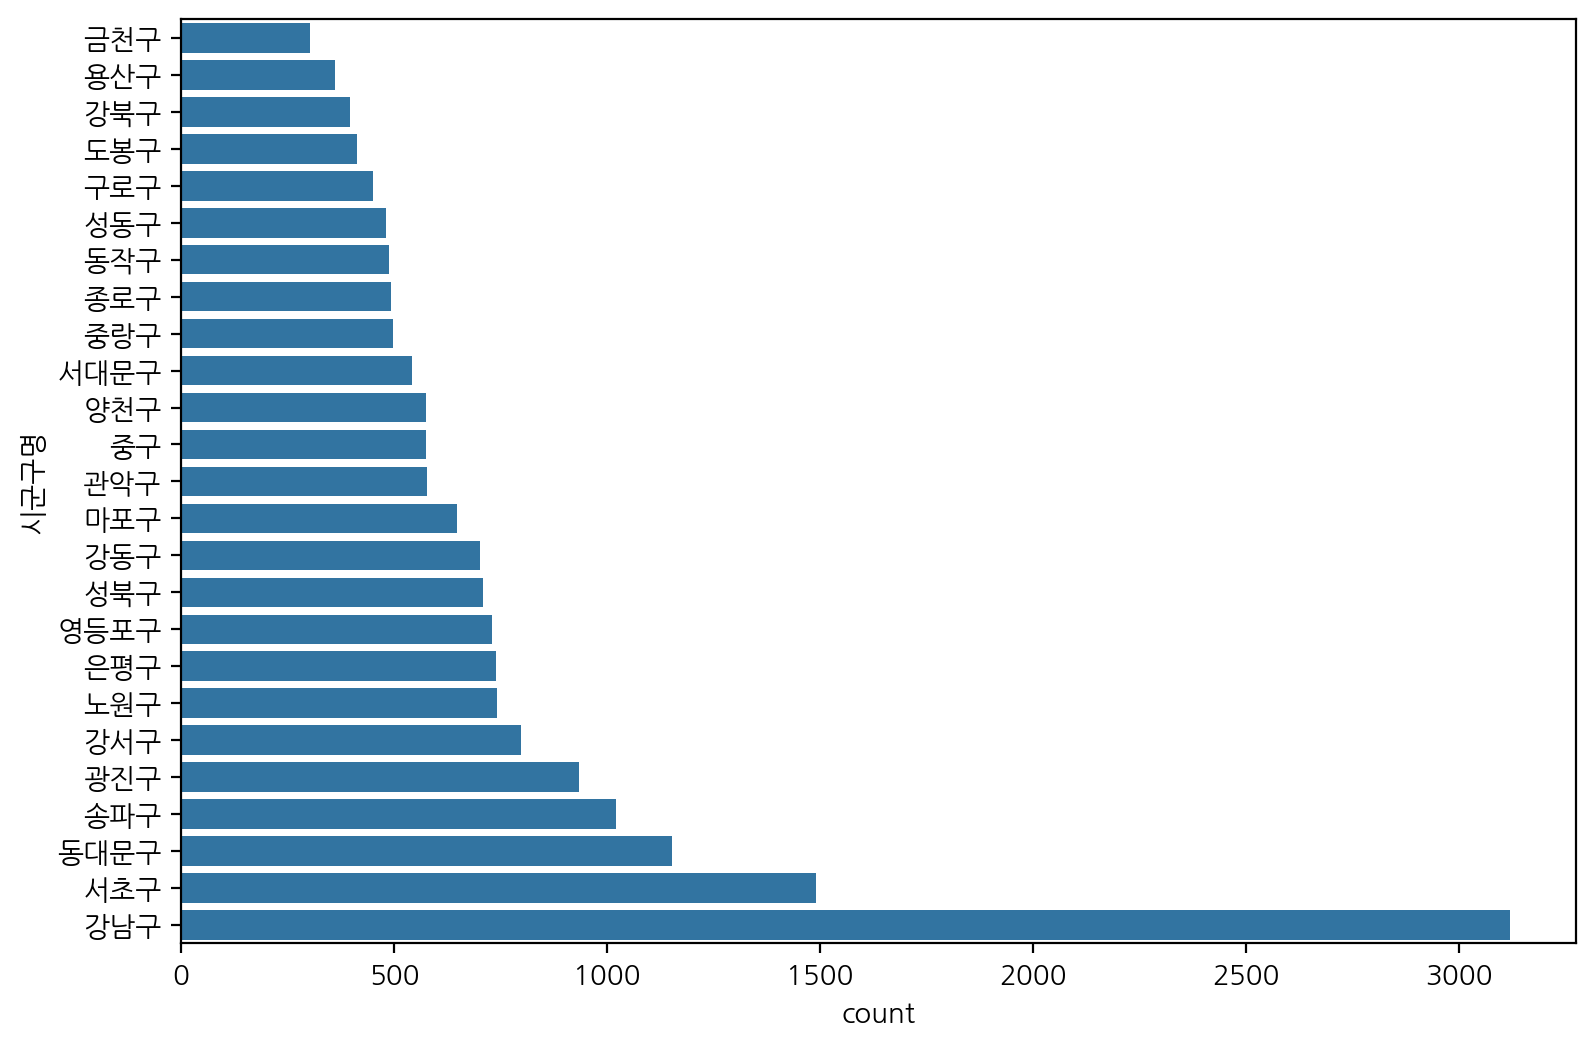

In [341]:
df_seoul_sort = df_seoul['시군구명'].value_counts(ascending=True).index
plt.figure(figsize=(9, 6))
sns.countplot(data=df_seoul, y="시군구명", order=df_seoul_sort)

<Axes: xlabel='경도', ylabel='위도'>

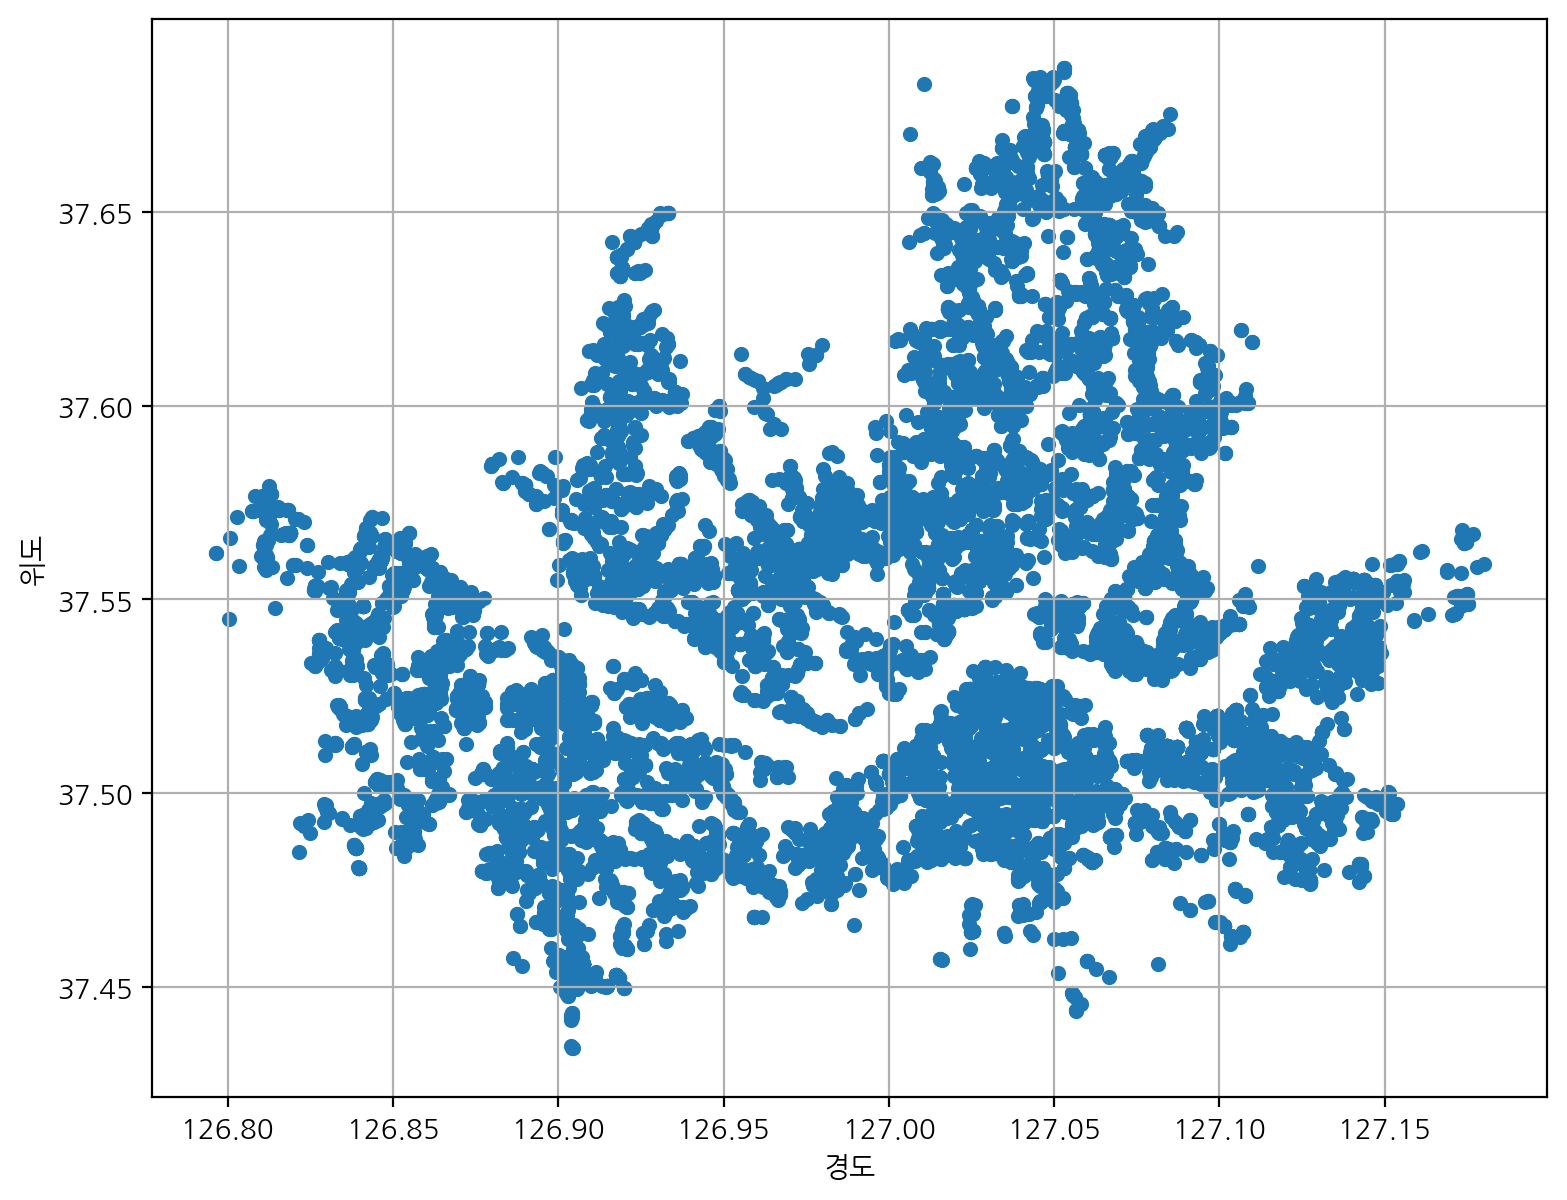

In [342]:
df_seoul[["경도", "위도", "시군구명"]].plot.scatter(
    x="경도", y="위도", figsize=(9, 7), grid=True)

<Axes: xlabel='경도', ylabel='위도'>

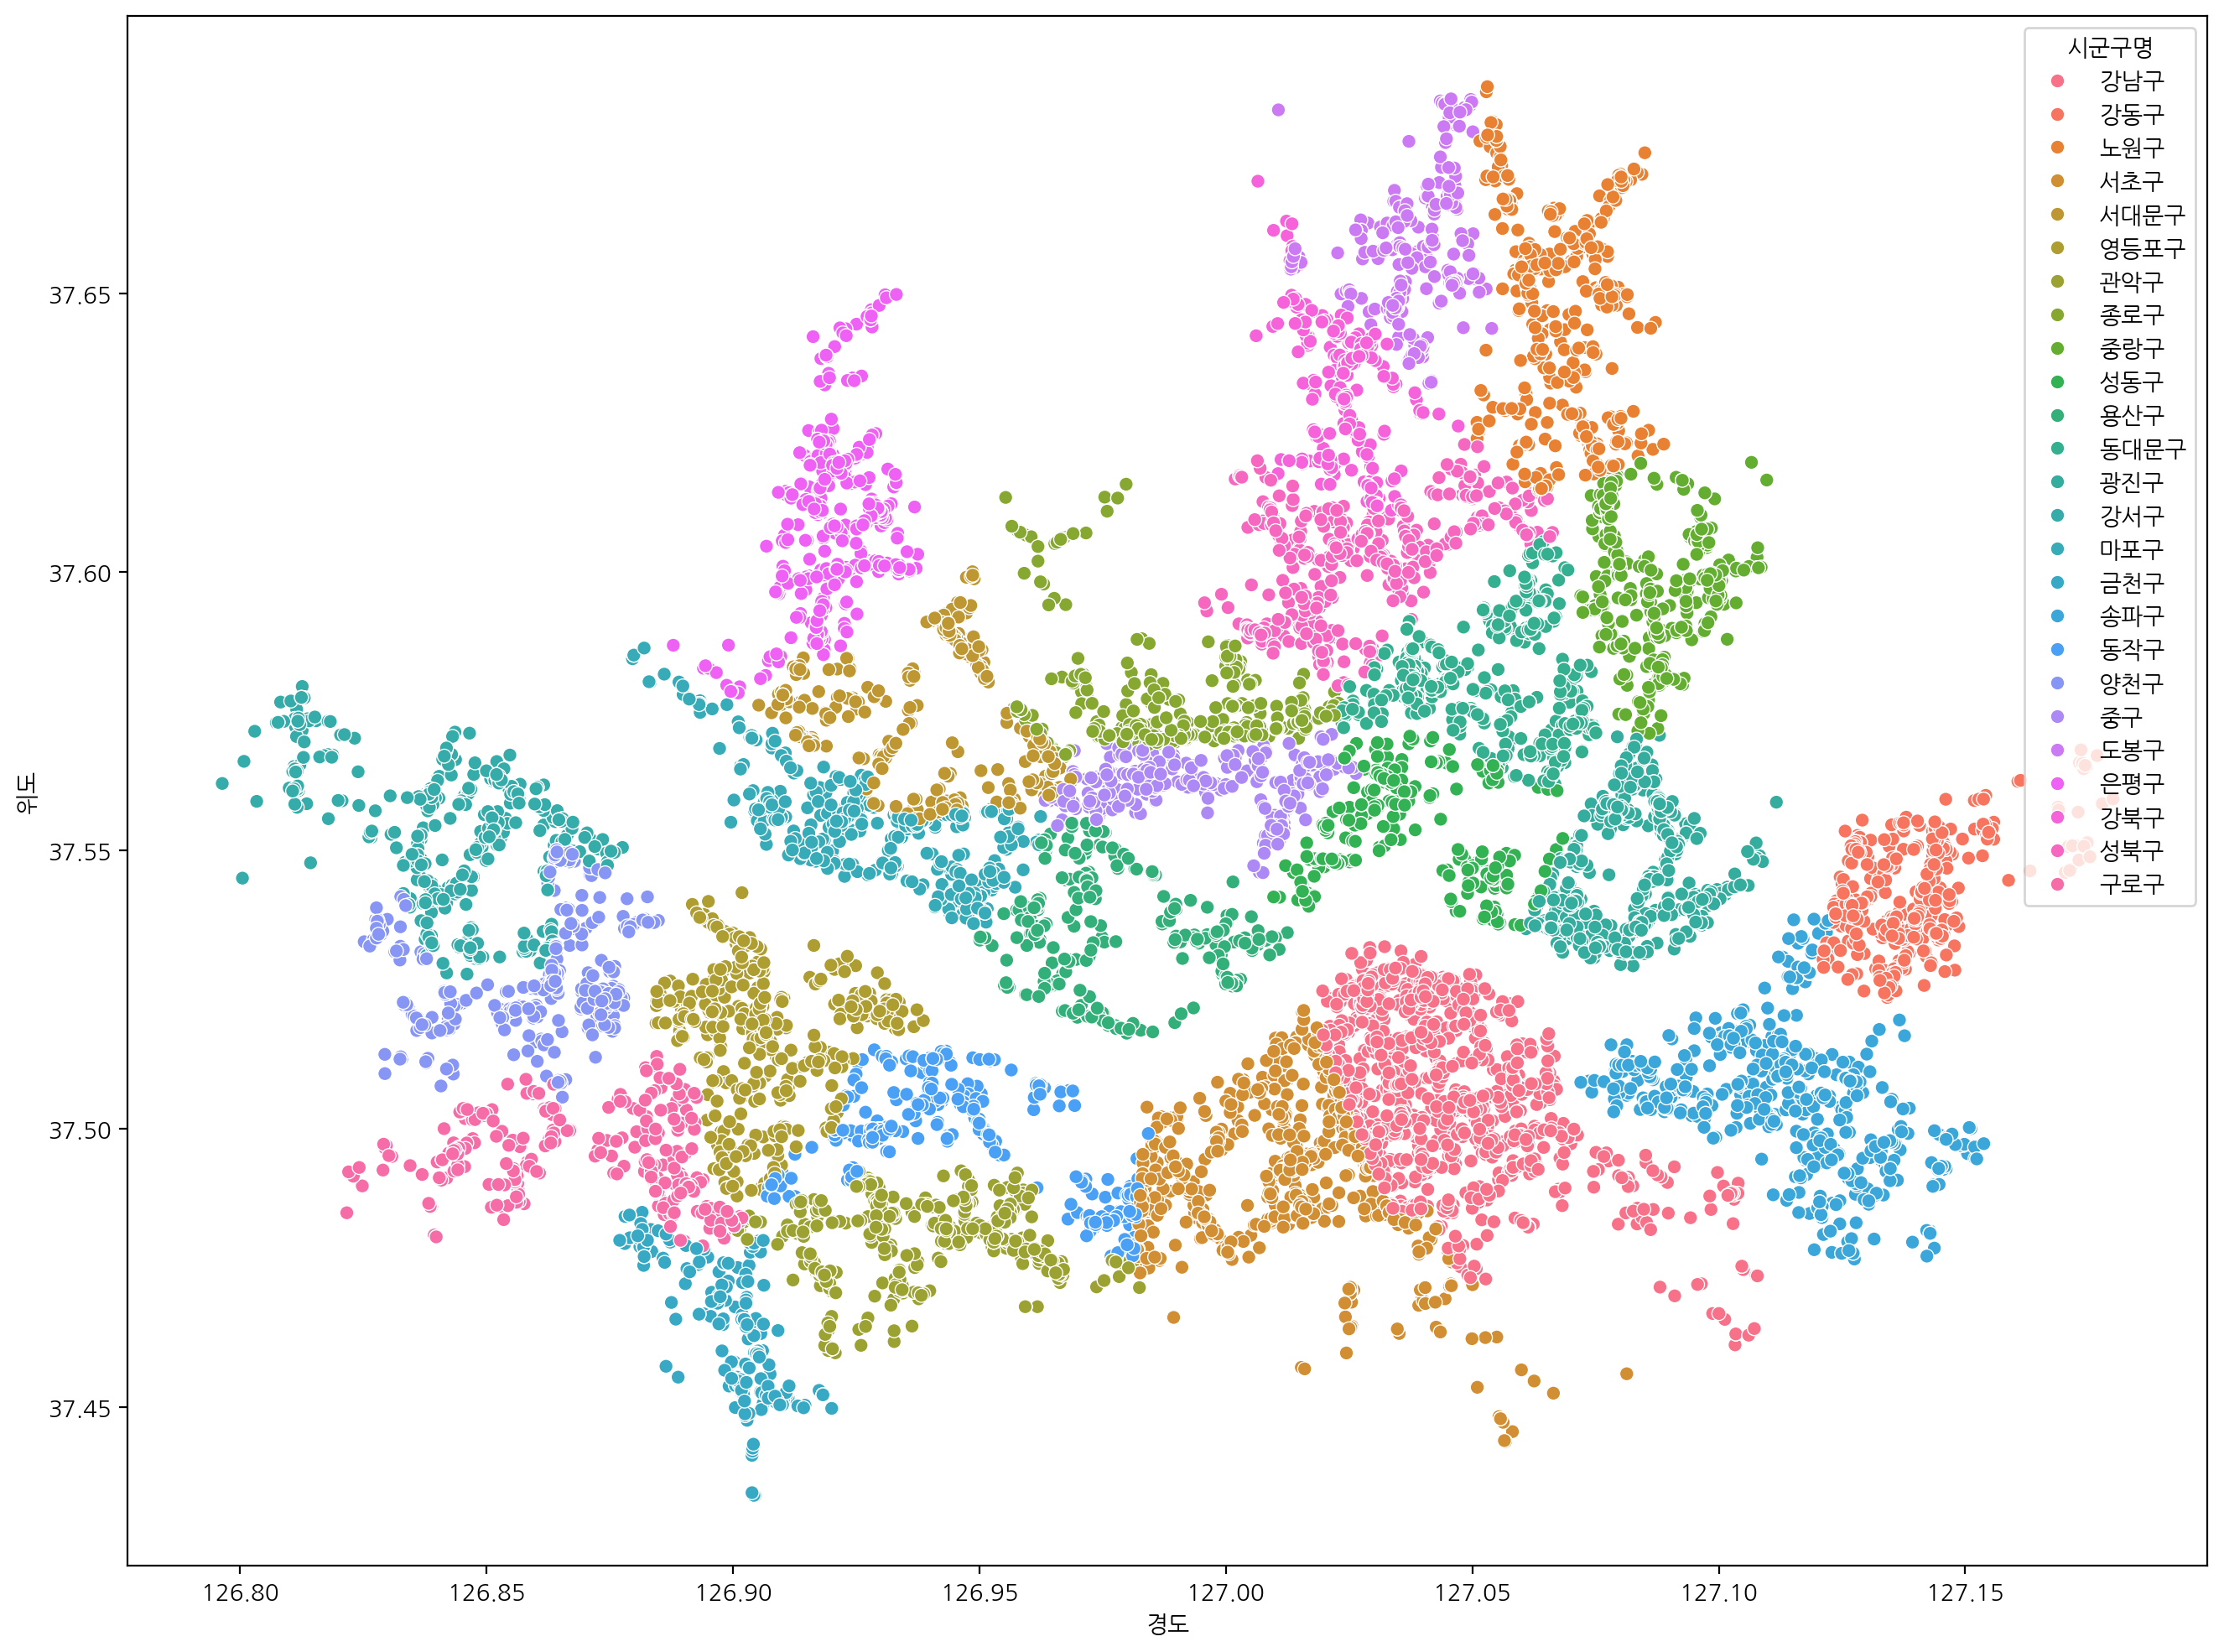

In [343]:
plt.figure(figsize=(16, 12))
sns.scatterplot(data=df_seoul,
                x='경도', y='위도', hue='시군구명')

<Axes: xlabel='경도', ylabel='위도'>

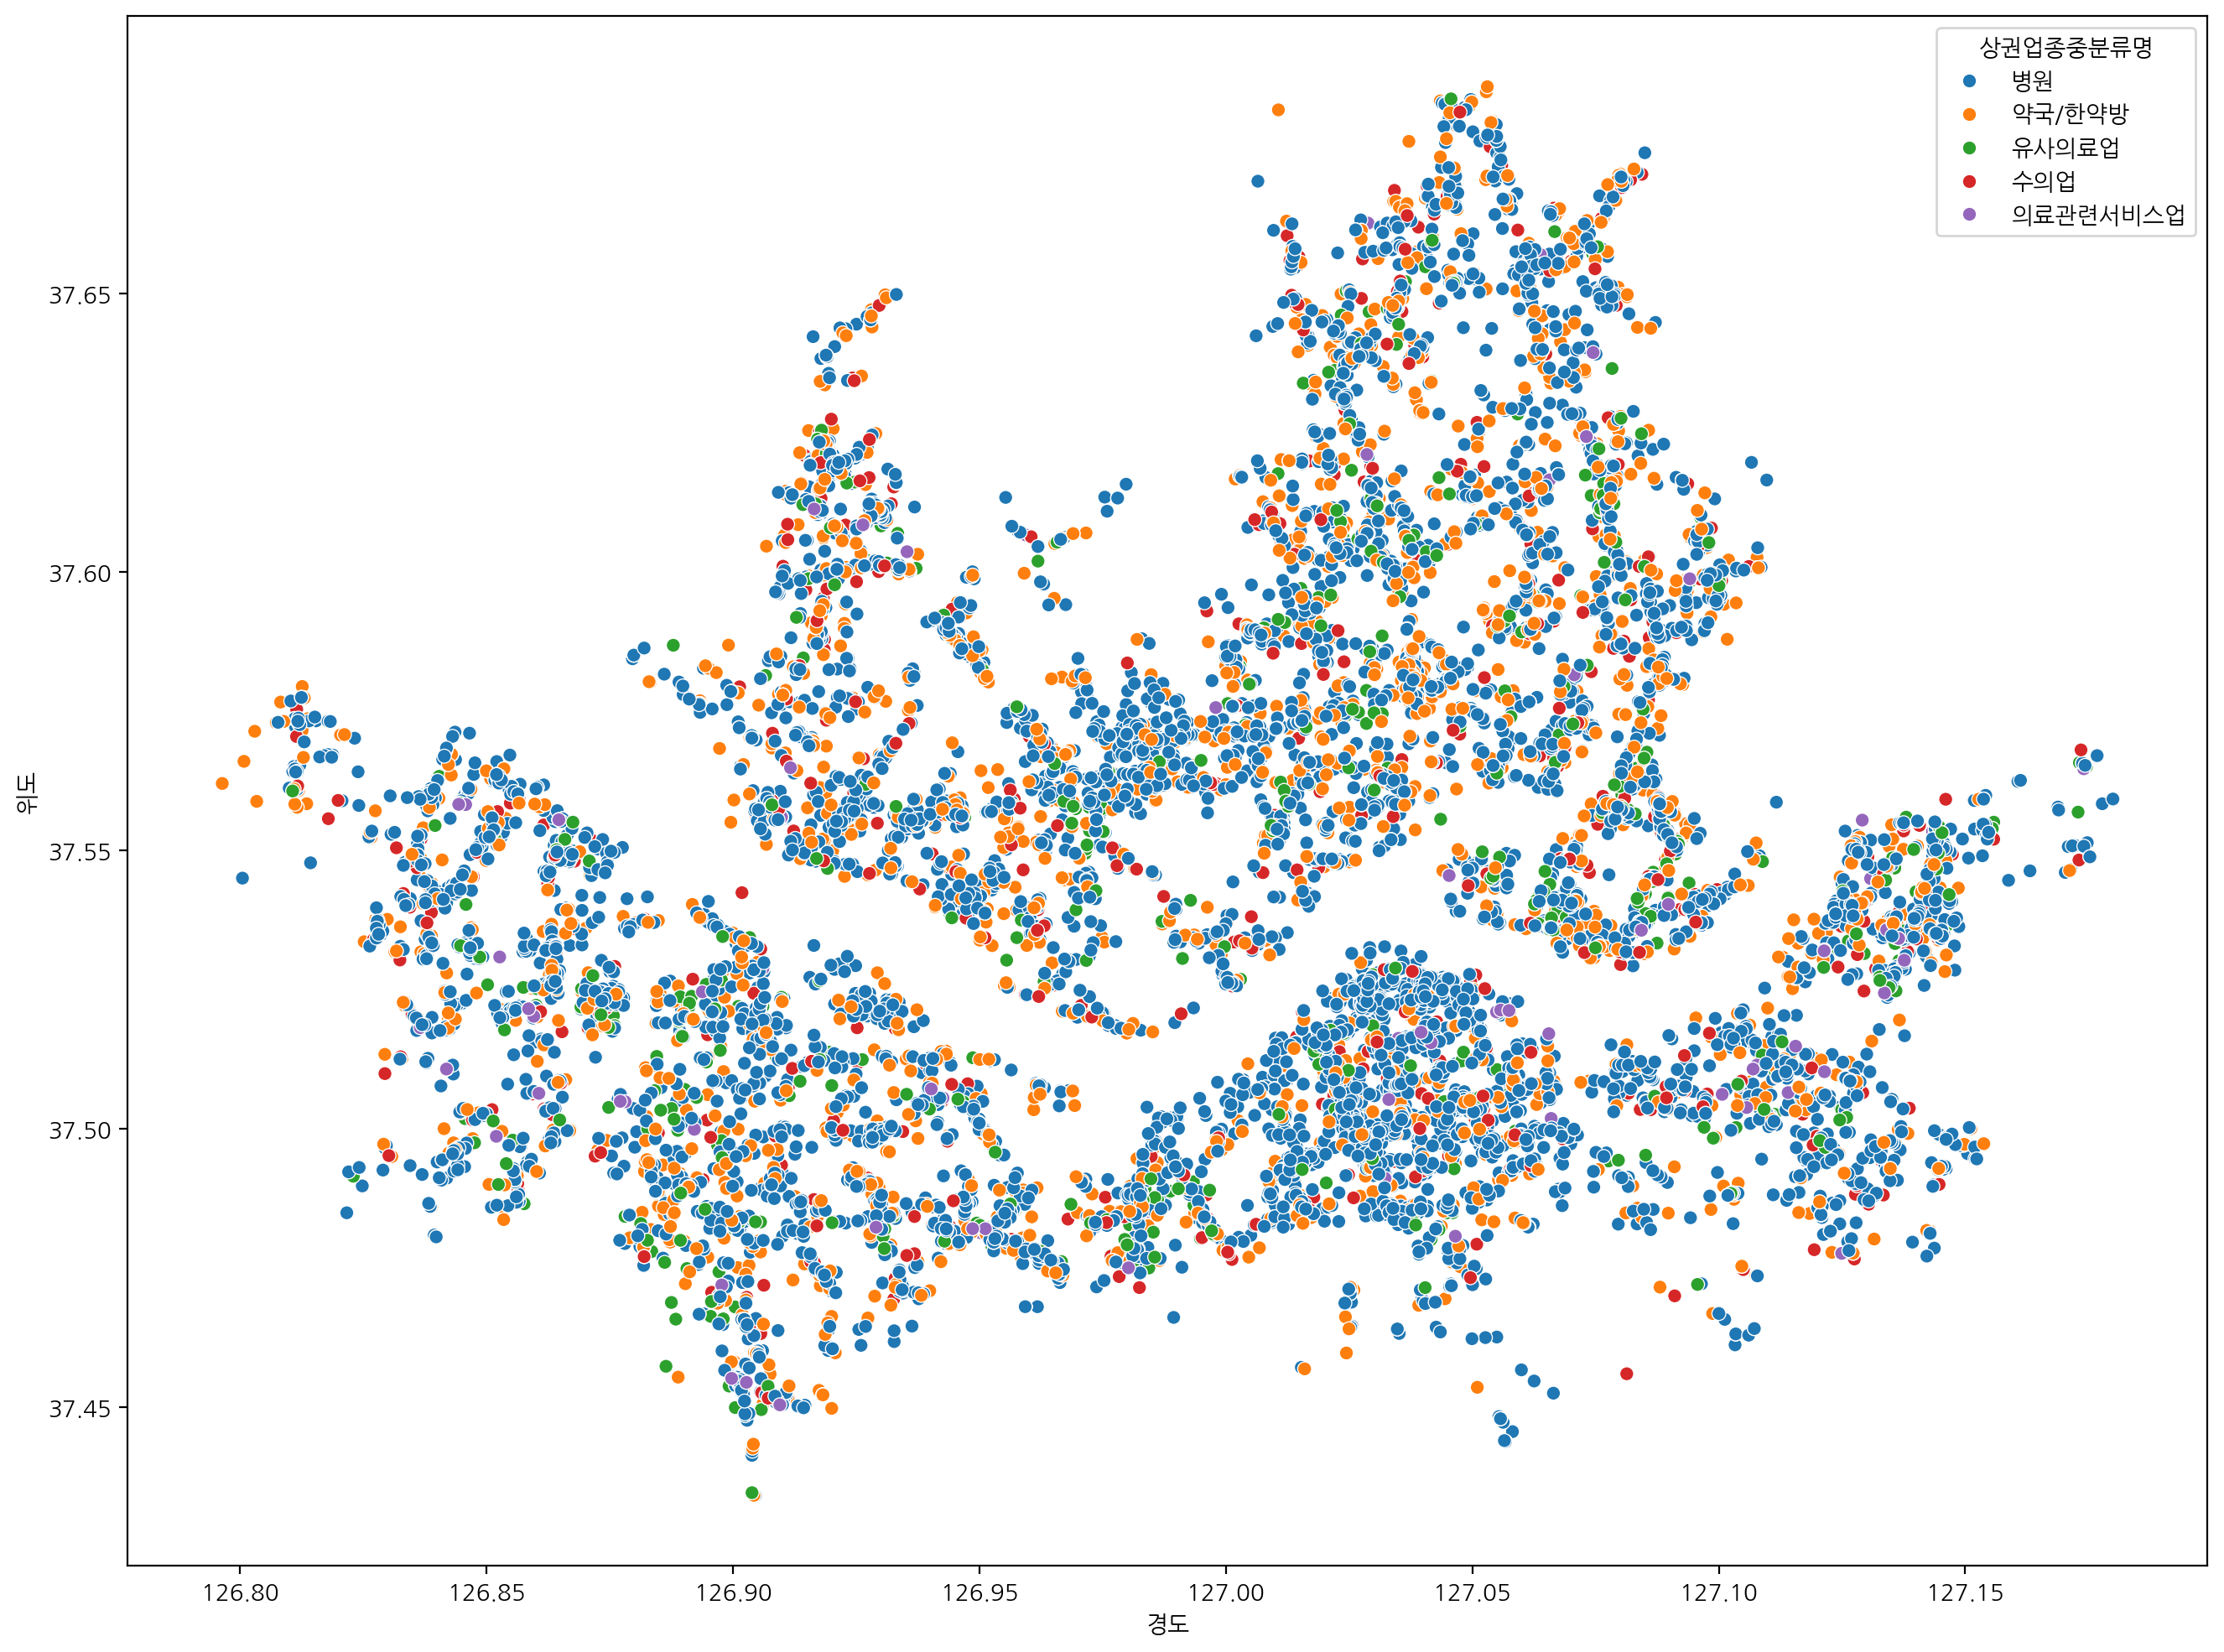

In [344]:
plt.figure(figsize=(16, 12))
sns.scatterplot(data=df_seoul,
                x='경도', y='위도', hue="상권업종중분류명")

<Axes: xlabel='경도', ylabel='위도'>

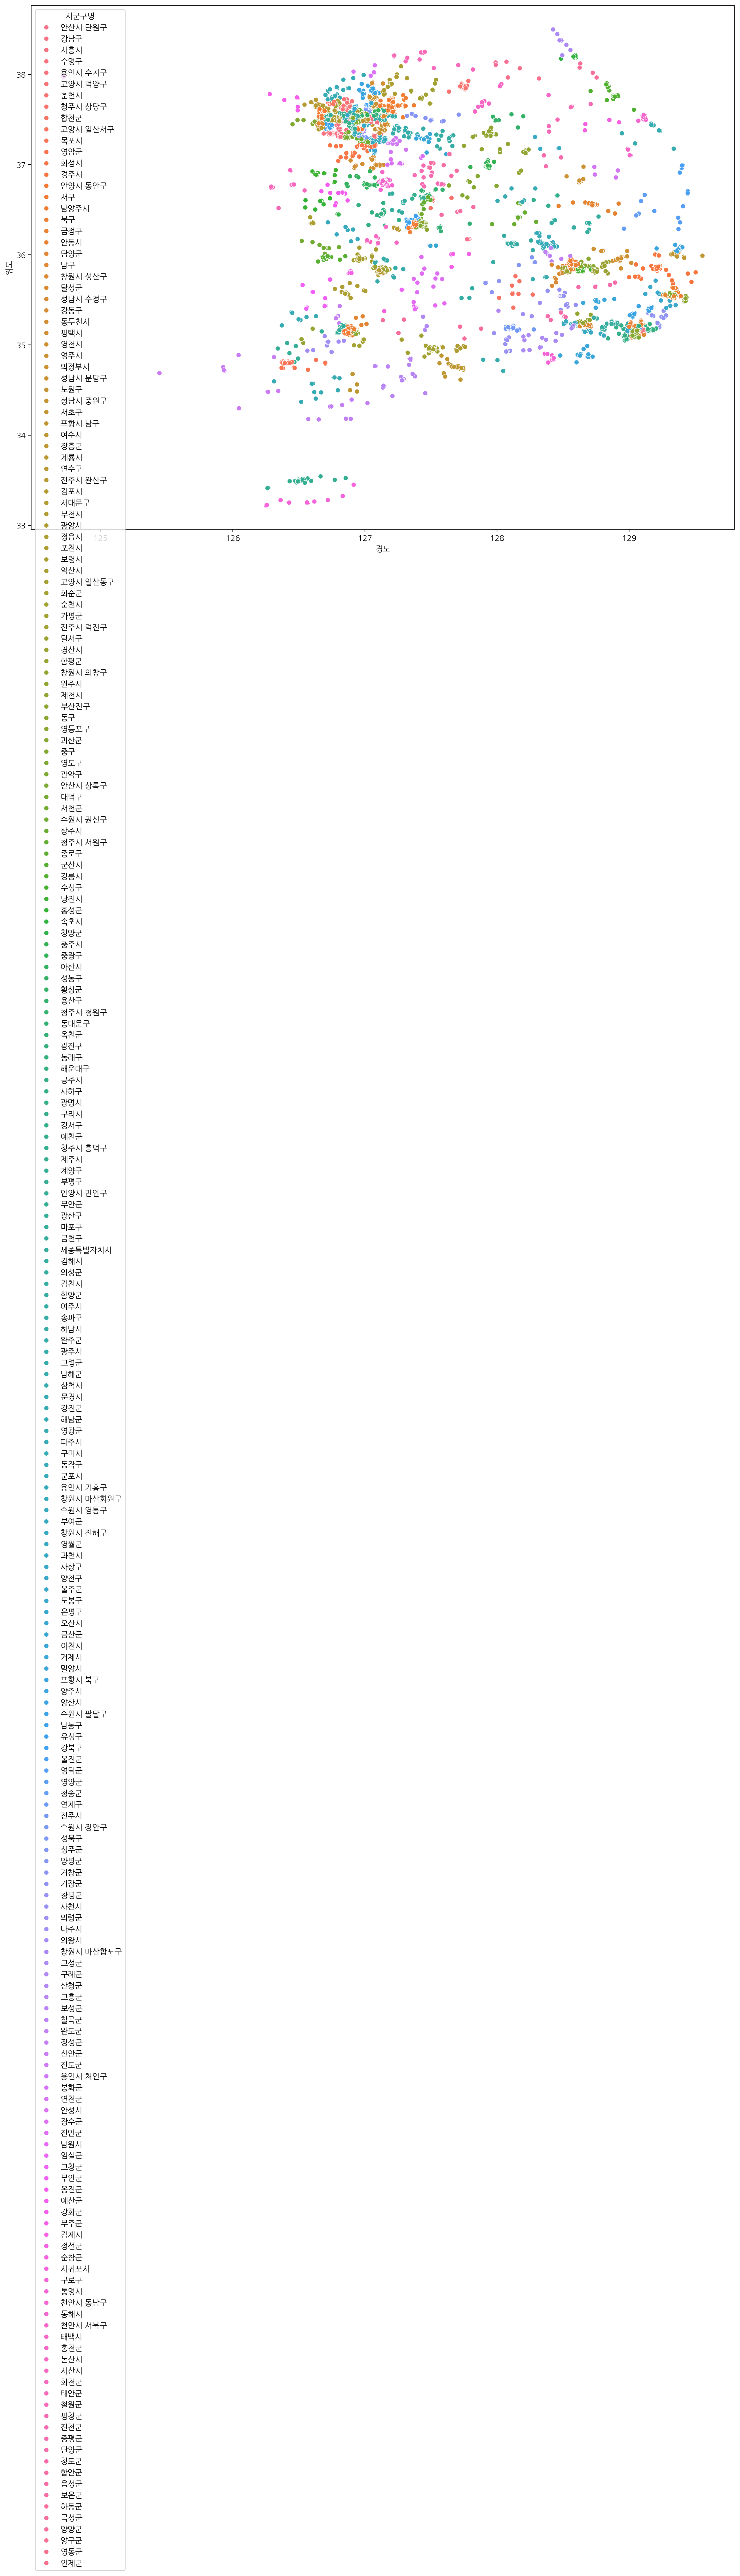

In [345]:
plt.figure(figsize=(16, 12))
sns.scatterplot(data=df[:10000],
                x='경도', y='위도', hue='시군구명')

### Question

### Q1.

Calculate the number of pharmacies by region across the country!

Find the frequency of entries where the "business type subcategory name" is "pharmacy." You can use various aggregation methods such as `value_counts`, `groupby`, or `pivot_table` to calculate the frequency. Use whichever method you find most convenient to obtain the results. The final output should match the following format.

🔽 **Example Output**

경기도        4510  
서울특별시      3579  
부산광역시      1130  
경상남도       1017  
인천광역시      1002  
경상북도        915  
대구광역시       870  
전라북도        862  
충청남도        830  
전라남도        811  
강원도         729  
광주광역시       691  
충청북도        648  
대전광역시       603  
울산광역시       362  
제주특별자치도     226  
세종특별자치시      99  

In [346]:
tmp = df_raw.copy()

In [347]:
tmp.head(3)

상가업소번호        상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
0  19956873     하나산부인과  NaN         S       의료       S01       병원    S01B10   
1  20024149   타워광명내과의원  NaN         S       의료       S01       병원    S01B07   
2  20152277  조정현신경외과의원  NaN         S       의료       S01       병원    S01B15   

  상권업종소분류명 표준산업분류코드  ...                     건물관리번호      건물명  \
0     산부인과   Q86201  ...  4127310900110810000010857  산호한양아파트   
1    내과/외과   Q86201  ...  1168011800104670014000001      NaN   
2     신경외과   Q86201  ...  4139013200117400001017064    한라프라자   

                 도로명주소     구우편번호    신우편번호  동정보  층정보  호정보          경도  \
0   경기도 안산시 단원구 달미로 10  425764.0  15236.0  NaN  NaN  NaN  126.814295   
1  서울특별시 강남구 언주로30길 39  135270.0   6292.0  NaN    4  NaN  127.053198   
2    경기도 시흥시 중심상가로 178  429450.0  15066.0  NaN  NaN  NaN  126.734841   

          위도  
0  37.336344  
1  37.488742  
2  37.344955  

[3 rows x 39 columns]

In [348]:

count = tmp[tmp['상권업종소분류명'] == '약국']['시도명'].value_counts()
print(count)

시도명
경기도        4510
서울특별시      3579
부산광역시      1130
경상남도       1017
인천광역시      1002
경상북도        915
대구광역시       870
전라북도        862
충청남도        830
전라남도        811
강원도         729
광주광역시       691
충청북도        648
대전광역시       603
울산광역시       362
제주특별자치도     226
세종특별자치시      99
Name: count, dtype: int64


In [349]:
count_groupby = tmp[tmp['상권업종소분류명'] == '약국'].groupby('시도명').size().sort_values(ascending=False)
print(count_groupby)

시도명
경기도        4510
서울특별시      3579
부산광역시      1130
경상남도       1017
인천광역시      1002
경상북도        915
대구광역시       870
전라북도        862
충청남도        830
전라남도        811
강원도         729
광주광역시       691
충청북도        648
대전광역시       603
울산광역시       362
제주특별자치도     226
세종특별자치시      99
dtype: int64


### Q2.

You have joined a startup that operates a business related to pets, and you've been asked to conduct a commercial area analysis. Hospitals and pharmacies are typically located in areas with high population density or foot traffic. So, are animal hospitals also more likely to be located in areas where there are many hospitals or pharmacies? Please calculate the frequency and visualize the data to analyze which areas have the most animal hospitals. The goal is to produce results similar to the example provided.
  
🔽 **Example Output**
  
경기도        992  
서울특별시      557  
인천광역시      193  
경상북도       165  
경상남도       161  
부산광역시      153  
충청남도       131  
대구광역시      119  
전라북도       111  
강원도         85  
대전광역시       77  
전라남도        77  
충청북도        75
광주광역시       71  
울산광역시       61  
제주특별자치도     46  
세종특별자치시     13  
Name: 시도명, dtype: int64

In [350]:
count_animal = tmp[tmp['상권업종소분류명'] == '동물병원']['시도명'].value_counts()
print(count_animal)

시도명
경기도        992
서울특별시      557
인천광역시      193
경상북도       165
경상남도       161
부산광역시      153
충청남도       131
대구광역시      119
전라북도       111
강원도         85
대전광역시       77
전라남도        77
충청북도        75
광주광역시       71
울산광역시       61
제주특별자치도     46
세종특별자치시     13
Name: count, dtype: int64


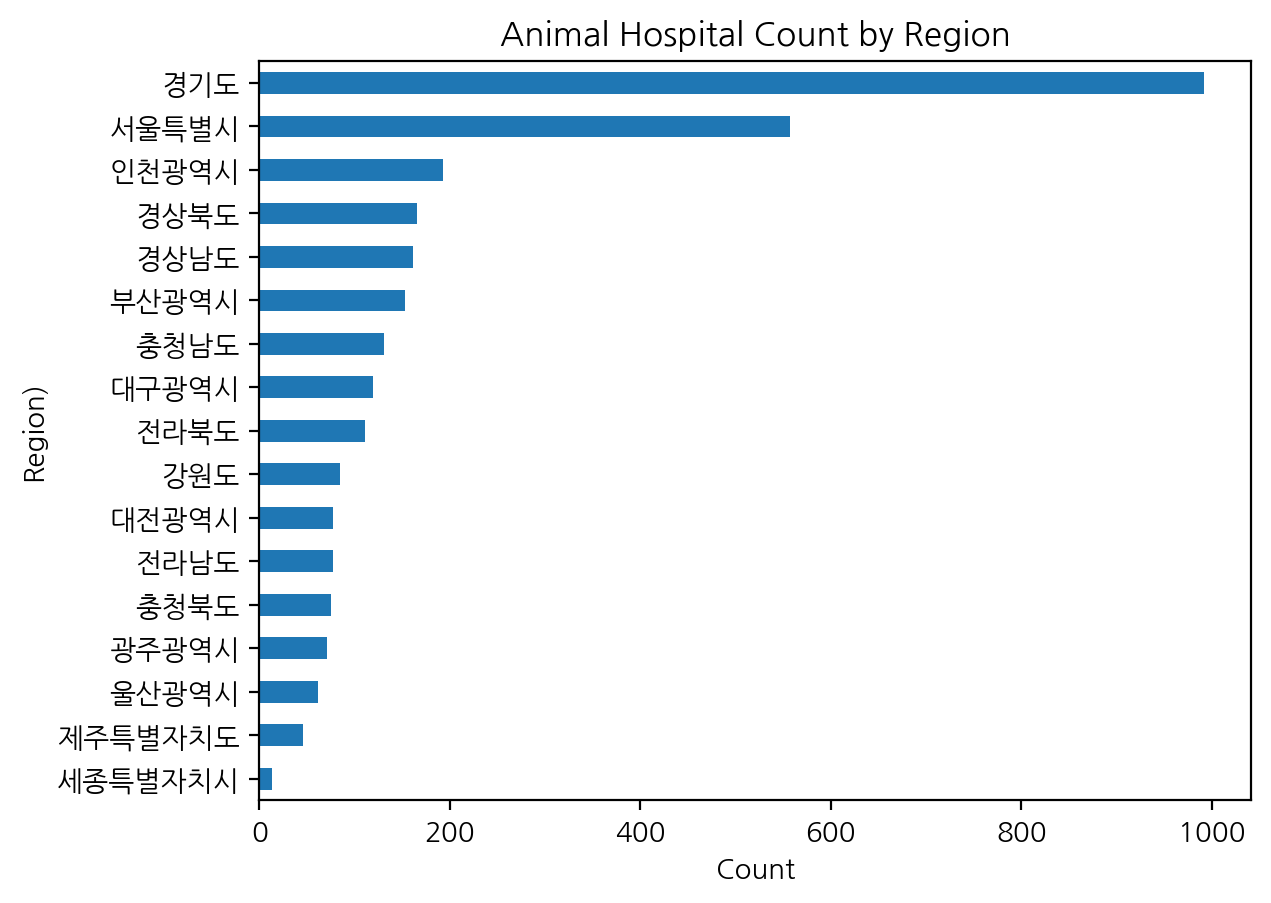

In [359]:
sorted_count_animal = count_animal.sort_values(ascending=True)
sorted_count_animal.plot.barh()
plt.title("Animal Hospital Count by Region")
plt.xlabel("Count")
plt.ylabel("Region)")
plt.show()

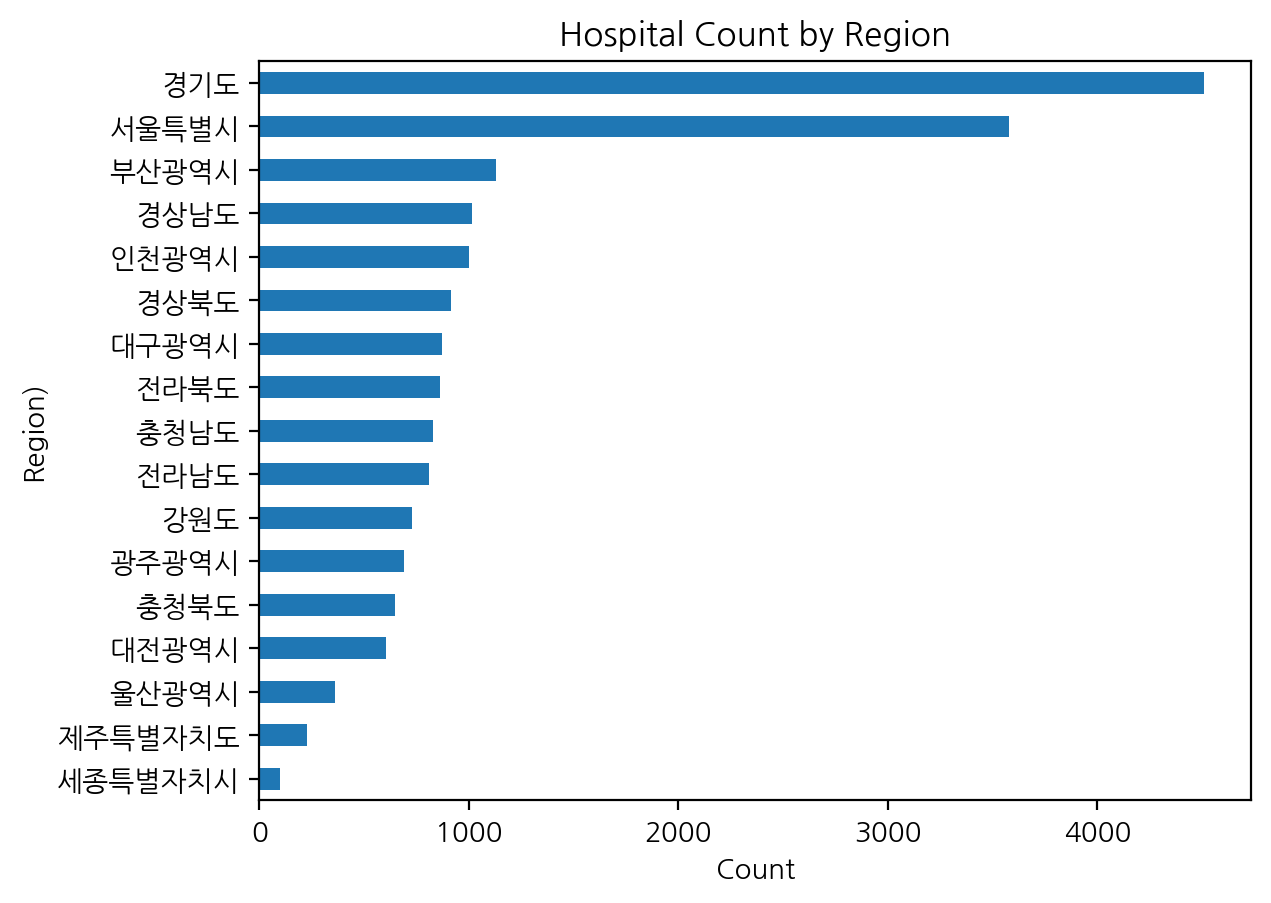

In [360]:
sorted_count = count.sort_values(ascending=True)
sorted_count.plot.barh()
plt.title("Hospital Count by Region")
plt.xlabel("Count")
plt.ylabel("Region)")
plt.show()

### Q3.

Are there more dermatology or plastic surgery clinics in the Gangnam area compared to other regions?

It seems that there are more dermatology and plastic surgery clinics in the Gangnam area compared to other regions. Let's find out how much of a proportion dermatology and plastic surgery clinics occupy in this area compared to the total number of hospitals in the area.

- Find the hospital subcategories in Seoul that contain "Dermatology" or "Plastic Surgery" in their names.
- Calculate the ratio of dermatology and plastic surgery clinics to the total number of hospitals.
- Sort the results in descending order of the ratio.
- To round to two decimal places, search for how to use the `pandas round` function.

🔽 **Example Output**
  
시군구명  
강남구     0.24  
서초구     0.17  
마포구     0.09  
영등포구    0.08   
서대문구    0.08  
강서구     0.07  
강동구     0.07  
중구      0.07  
양천구     0.07  
중랑구     0.07  
성북구     0.06  
송파구     0.06  
구로구     0.06  
은평구     0.06  
광진구     0.06  
노원구     0.05  
성동구     0.05  
금천구     0.05   
용산구     0.05  
강북구     0.05  
동대문구    0.04  
동작구     0.04  
관악구     0.04  
종로구     0.03  
도봉구     0.02  

In [353]:
seoul = tmp[(tmp['시도명'] == '서울특별시') & (tmp["상권업종중분류명"] == "병원")]
filtered = seoul[seoul['상권업종소분류명'].str.contains('피부|성형')]
# The '|' symbol is used as an OR operator in regular expressions
# it allows us to match rows containing either '피부' or '성형'

In [354]:
total_count = seoul["시군구명"].value_counts()
count_filtered = filtered["시군구명"].value_counts()
proportions = round(count_filtered / total_count,2).sort_values(ascending=False)
print(proportions)

시군구명
강남구     0.24
서초구     0.17
마포구     0.09
영등포구    0.08
서대문구    0.08
강서구     0.07
강동구     0.07
중구      0.07
양천구     0.07
중랑구     0.07
성북구     0.06
송파구     0.06
구로구     0.06
은평구     0.06
광진구     0.06
노원구     0.05
성동구     0.05
금천구     0.05
용산구     0.05
강북구     0.05
동대문구    0.04
동작구     0.04
관악구     0.04
종로구     0.03
도봉구     0.02
Name: count, dtype: float64


### Q4.

As the average life expectancy continues to increase, the silver healthcare industry is gaining attention. You have joined a startup related to the silver healthcare industry. To better understand the locations of 'Elderly/Dementia Hospitals,' you want to visualize their distribution on a map. Using Folium, please visualize the locations of 'Elderly/Dementia Hospitals' across the country on a map! You can customize the map using Folium's documentation to add more features and make it more visually appealing.



In [355]:
# First, filter the dataFrame to include only rows
# where the 'business type subcategory' is 'Elderly/Dementia Hospitals'
filtered_seniors = tmp[tmp['상권업종소분류명'] =='노인/치매병원']


In [356]:
m = folium.Map(location=[filtered_seniors['위도'].mean(),
                         filtered_seniors['경도'].mean()],
                 zoom_start=12)

for n in filtered_seniors.index:
    popup_name = filtered_seniors.loc[n, '상호명'] + ' - ' + filtered_seniors.loc[n, '도로명주소']
    folium.Marker(
        location = [filtered_seniors.loc[n,'위도'], filtered_seniors.loc[n, '경도']],
        popup = popup_name,
        tooltip = popup_name
    ).add_to(m)
m
# Both the popup and tooltip display the hospital's name (상호명) and its address (도로명주소)
